# Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Changing working directory

In [2]:
os.chdir('C:/Users/DELL/Pandas')

# Loading and Analysing Data

In [3]:
car_df = pd.read_csv('used_cars_data.csv')
car_df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
car_data = car_df.copy(deep=True)

In [5]:
car_df.shape

(7253, 14)

# Column wise null values in data set and their location on heat map of data

In [6]:
car_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<Axes: >

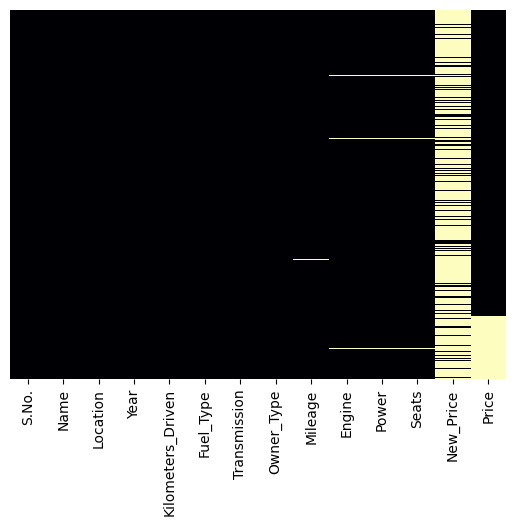

In [7]:
sns.heatmap(car_df.isnull(), yticklabels= False , cbar= False, cmap='magma')

* Dropping the S.No column as it is not relvenat to the study

In [8]:
car_df.drop(['S.No.'], axis = 1, inplace =True)

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [10]:
car_df.describe(include = 'all').T

count unique                     top  freq          mean  \
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage              7251    450               17.0 kmpl   207           NaN   
Engine               7207    150                 1197 CC   732           NaN   
Power                7207    386                  74 bhp   280           NaN   
Seats              7200.0    NaN                     NaN   NaN      5.279722   
New_Price            1006    625              63.71 Lakh     6           NaN   
Price              6019.0    NaN                     NaN   NaN      9.479468   

                            std     min      25%      50%      75%        max  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254421  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84427.720583   171.0  34000.0  53416.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                     NaN     NaN      NaN      NaN      NaN        NaN  
Engine                      NaN     NaN      NaN      NaN      NaN        NaN  
Power                       NaN     NaN      NaN      NaN      NaN        NaN  
Seats                   0.81166     0.0      5.0      5.0      5.0       10.0  
New_Price                   NaN     NaN      NaN      NaN      NaN        NaN  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

* Name has 2041 unique values. The top most repeating car is Mahindra XUV500 W8 2WD. This has appeared 55 times in the dataset.
* Location has 11 unique values. Mumbai is the most repeating city. It has appeared 948 times.
* Year has data from 1996 - 2019. Most of the vehcles are from 2014.
* Kilometers_Driven range from 171 - 6500000. There may be few outliers as this number seems to be high
* Fuel Type has 5 unique values. Most of the cars are Diesel based.
* Transmission has 2 unique values. Most of the cars are Manual.
* Owner Type has 4 unique values. Most of vehicles are sold first time after fresh purchase.
* Most of the cars mileage (per manufacturer) is 17.0 kmpl, 1197CC Engine and 74bhp power
* Majority of cars are of 5 seater.
* Price of the car range from 0.44 Lakhs to 160 lakhs. Most of them are about 5.64 lakhs
* Most of New price of cars is 63.71 lakh. This value indicates the most of the cars are luxury vehicles which may not be correct. 

#  Finding Numeric and Categorical variables

In [11]:
## checking for dublicate raw in data
car_df.duplicated().sum()

1

In [12]:
## dropping dublicate raw
car_df.drop_duplicates(keep = 'last', inplace = True)
print('Number of duplicates in dataset:',car_df.duplicated().sum())

Number of duplicates in dataset: 0


In [13]:
# Getting numerical and categorical variables 
pd.set_option('max_colwidth',100)
df1 = pd.DataFrame()

df1['Number of Numerical columns'] = [len(car_df.select_dtypes(exclude = 'object').columns)]
df1['Numerical columns'] = [car_df.select_dtypes(exclude = 'object').columns.tolist()]
df1['Number of Ctaegorical columns'] = [len(car_df.select_dtypes(exclude = 'number').columns)]
df1['Categorical columns'] = [car_df.select_dtypes(exclude = 'number').columns.tolist()]

display(df1.T.rename(columns ={0:'Column Information'}))


Column Information
Number of Numerical columns                                                                                           4
Numerical columns                                                               [Year, Kilometers_Driven, Seats, Price]
Number of Ctaegorical columns                                                                                         9
Categorical columns            [Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, New_Price]

* After we dropped S.No. columns. there are 4 numerical and 9 categorical features


* Now let's check unique value in dataset

# Pre Processing of data and assinging right data type to columns

In [14]:
car_df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

* Columns : Location, Year, Fuel_Type, Transmission, Owner_Type, Seats  have lesser number of unique values

In [15]:
cols = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
for i in cols:
    print('Unique values and count in column', i, 'are:')
    unique_values = car_df[i].value_counts(dropna=False, ascending=False)
    percentages = unique_values * 100 / len(car_df)
    summary_df = pd.DataFrame({'Count': unique_values, 'Percent': percentages})
    display(summary_df)

Unique values and count in column Location are:


Count    Percent
Location                    
Mumbai        948  13.072256
Hyderabad     876  12.079426
Coimbatore    772  10.645339
Kochi         772  10.645339
Pune          765  10.548814
Delhi         660   9.100938
Kolkata       654   9.018202
Chennai       591   8.149476
Jaipur        499   6.880860
Bangalore     440   6.067292
Ahmedabad     275   3.792057

Unique values and count in column Year are:


Count    Percent
Year                  
2015    929  12.810259
2014    925  12.755102
2016    886  12.217319
2013    791  10.907336
2017    709   9.776613
2012    690   9.514617
2011    579   7.984004
2010    406   5.598456
2018    361   4.977937
2009    252   3.474903
2008    207   2.854385
2007    148   2.040816
2019    119   1.640927
2006     89   1.227248
2005     68   0.937672
2004     35   0.482625
2003     20   0.275786
2002     18   0.248207
2001      8   0.110314
2000      5   0.068946
1998      4   0.055157
1999      2   0.027579
1996      1   0.013789

Unique values and count in column Fuel_Type are:


Count    Percent
Fuel_Type                  
Diesel      3852  53.116382
Petrol      3324  45.835632
CNG           62   0.854937
LPG           12   0.165472
Electric       2   0.027579

Unique values and count in column Transmission are:


Count    Percent
Transmission                  
Manual         5203  71.745725
Automatic      2049  28.254275

Unique values and count in column Owner_Type are:


Count    Percent
Owner_Type                      
First            5951  82.060121
Second           1152  15.885273
Third             137   1.889134
Fourth & Above     12   0.165472

Unique values and count in column Seats are:


Count    Percent
Seats                  
5.0     6046  83.370105
7.0      796  10.976282
8.0      170   2.344181
4.0      119   1.640927
NaN       53   0.730833
6.0       38   0.523993
2.0       18   0.248207
10.0       8   0.110314
9.0        3   0.041368
0.0        1   0.013789

* From the Avobe it can be seen that:
##### More than 50% of all the cars, are sold in Mumbai, Hyderabad, Kochi, Coimbatore, and pune
##### Majority of car are sold in year 2013,14,15,16
##### More than 50% of all car sold were Diesal type
##### Almost 70% of the cars sold are of manual transmission type.
##### More than 80% of the car sold were 1st time up for sale after brand new purchase
##### Most of cars sold are of 5 seater type.

*** Seats: have unique value of 0( for one car only) and Nan(53), which is contradictory to practical set up of a car. Let's Fix them

In [16]:
### For Seats = 0 and NANs
print('Record with Seat 0')
car_df[car_df['Seats']==0.0]

Record with Seat 0


Name   Location  Year  Kilometers_Driven  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012             125000   

     Fuel_Type Transmission Owner_Type    Mileage   Engine     Power  Seats  \
3999    Petrol    Automatic      First  10.5 kmpl  3197 CC  null bhp    0.0   

     New_Price  Price  
3999       NaN   18.0

* As this is just one record, cross varification from data is not possible. From domain knowledge 'Audi A4 3.2 FSI Tiptronic Quattro' is a 5 seater. So imputing Seats = 5 for this record

In [17]:
car_df.loc[car_df['Seats']==0.0,'Seats'] = 5.0
display(car_df[car_df['Name']=='Audi A4 3.2 FSI Tiptronic Quattro'])
display('Where Seats was ==0.0, has been imputed and replced by 5')

Name   Location  Year  Kilometers_Driven  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012             125000   

     Fuel_Type Transmission Owner_Type    Mileage   Engine     Power  Seats  \
3999    Petrol    Automatic      First  10.5 kmpl  3197 CC  null bhp    5.0   

     New_Price  Price  
3999       NaN   18.0

'Where Seats was ==0.0, has been imputed and replced by 5'

In [18]:
nan_in_Seats = car_df['Seats'].isnull().sum()
print('Numbe of missing values in Seats is {}'.format(nan_in_Seats))

Numbe of missing values in Seats is 53


In [19]:
## Getting the name of cars with missing values
car_df[car_df['Seats'].isna()].Name.value_counts()

Name
Maruti Swift 1.3 VXi                            8
BMW 5 Series 520d Sedan                         7
Hyundai Santro GLS II - Euro II                 4
Maruti Estilo LXI                               3
Honda City 1.5 GXI                              3
Maruti Swift 1.3 LXI                            2
Toyota Etios Liva V                             2
Land Rover Range Rover 3.0 D                    2
Fiat Punto 1.4 Emotion                          2
Hyundai Santro Xing XG                          2
Maruti Swift 1.3 ZXI                            1
Fiat Punto 1.3 Emotion                          1
Mahindra TUV 300 P4                             1
Hyundai i20 new Sportz AT 1.4                   1
Toyota Etios Liva Diesel TRD Sportivo           1
Skoda Laura 1.8 TSI Ambition                    1
Fiat Punto 1.2 Dynamic                          1
Honda Jazz Select Edition                       1
Ford Endeavour Hurricane LE                     1
Honda CR-V AT With Sun Roof                  

* Most of the cas named are 5 seater, including the top 3 value counts. This median value of Seats, whcih is 5, can replace the nan value in Seats

In [20]:
print('Imputing median value for Seats with NaN value')
car_df['Seats'].fillna(car_df['Seats'].median(),inplace = True)
print('Missing value in Seats is:{}'.format(car_df['Seats'].isnull().sum()))
      

Imputing median value for Seats with NaN value
Missing value in Seats is:0


### Converting categorical varibale's type from object to category

In [21]:
car_df["Fuel_Type"] = car_df["Fuel_Type"].astype("category")
car_df["Transmission"] = car_df["Transmission"].astype("category")
car_df["Owner_Type"] = car_df["Owner_Type"].astype("category")
car_df["Seats"] = car_df["Seats"].astype("float")
car_df["Location"] = car_df["Location"].astype("category")
car_df["Year"]=car_df["Year"].astype("int")

In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int32   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7250 non-null   object  
 8   Engine             7206 non-null   object  
 9   Power              7206 non-null   object  
 10  Seats              7252 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(2), int32(1), int64(1), object(5)
memory usage: 567.5+ KB


## Converting Mileage, Power and Engine to int type


In [23]:
car_df[['Mileage','Engine','Power']].sample(8)

Mileage   Engine      Power
1794   28.4 kmpl  1248 CC  73.75 bhp
1934   28.4 kmpl  1248 CC  73.75 bhp
5600   25.8 kmpl  1498 CC   98.6 bhp
217   19.81 kmpl  1086 CC  68.05 bhp
3668  20.36 kmpl  1197 CC   78.9 bhp
1373  20.51 kmpl   998 CC  67.04 bhp
5482  22.54 kmpl  1396 CC  88.73 bhp
4738   18.0 kmpl   995 CC     62 bhp

In [24]:
print('Unique values in Milage')
display(car_df['Mileage'].unique())
print('Unique values in Power')
display(car_df['Power'].unique())
print('Unique values in Engine')
display(car_df['Engine'].unique())

Unique values in Milage


array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

Unique values in Power


array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

Unique values in Engine


array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

* Mileage has unit of 'kml' petrol, diesel cars and 'km/kg' for CNG cars. 
* Power has unit of bhp which stands for Brake HorsePower.
* Ingine has unit of CC which stands for Cubic Centimeter
* Thus removing units in Mileage, Power and Engine to convert values into integer

In [25]:
car_df['Power'] = car_df['Power'].replace(regex='bhp',value='') 
car_df['Engine'] = car_df['Engine'].replace(regex='CC',value='') 
car_df['Mileage'] = car_df['Mileage'].replace(regex='kmpl',value='') 
car_df['Mileage'] = car_df['Mileage'].replace(regex='km/kg',value='') 
### Converting null values into NaN
car_df['Power'] = car_df['Power'].replace(regex='null',value=np.nan) 
car_df['Mileage'] = car_df['Mileage'].replace(regex='null',value=np.nan) 
car_df['Engine'] = car_df['Engine'].replace(regex='null',value=np.nan) 
## printing unique values after removing units in coulmn vlaues
print('Unique values in Milage')
display(car_df['Mileage'].unique())
print('Unique values in Power')
display(car_df['Power'].unique())
print('Unique values in Engine')
display(car_df['Engine'].unique())

Unique values in Milage


array(['26.6 ', '19.67 ', '18.2 ', '20.77 ', '15.2 ', '21.1 ', '23.08 ',
       '11.36 ', '20.54 ', '22.3 ', '21.56 ', '16.8 ', '25.2 ', '12.7 ',
       '0.0 ', '13.5 ', '25.8 ', '28.4 ', '20.45 ', '14.84 ', '22.69 ',
       '23.65 ', '13.53 ', '18.5 ', '14.4 ', '20.92 ', '17.5 ', '12.8 ',
       '19.01 ', '14.53 ', '11.18 ', '12.4 ', '16.09 ', '14.0 ', '24.3 ',
       '18.15 ', '11.74 ', '22.07 ', '19.7 ', '25.4 ', '25.32 ', '14.62 ',
       '14.28 ', '14.9 ', '11.25 ', '24.4 ', '16.55 ', '17.11 ', '22.9 ',
       '17.8 ', '18.9 ', '15.04 ', '25.17 ', '20.36 ', '13.29 ', '13.68 ',
       '20.0 ', '15.8 ', '25.0 ', '16.4 ', '24.52 ', '22.1 ', '8.5 ',
       '15.1 ', '16.95 ', '19.64 ', '16.5 ', '18.53 ', '17.57 ', '18.0 ',
       '23.2 ', '16.73 ', '17.0 ', '13.0 ', '17.68 ', '22.7 ', '16.2 ',
       '15.26 ', '23.0 ', '19.83 ', '14.94 ', '17.71 ', '14.74 ', '16.0 ',
       '22.32 ', '12.99 ', '23.3 ', '19.15 ', '10.8 ', '15.0 ', '22.0 ',
       '21.9 ', '12.05 ', '11.7 ', '21.21 ', '2

Unique values in Power


array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', nan, '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.06 '

Unique values in Engine


array(['998 ', '1582 ', '1199 ', '1248 ', '1968 ', '814 ', '1461 ',
       '2755 ', '1598 ', '1462 ', '1497 ', '2179 ', '2477 ', '1498 ',
       '2143 ', '1995 ', '1984 ', '1197 ', '2494 ', '1798 ', '2696 ',
       '2698 ', '1061 ', '1198 ', '2987 ', '796 ', '624 ', '1999 ',
       '1991 ', '2694 ', '1120 ', '2498 ', '799 ', '2393 ', '1399 ',
       '1796 ', '2148 ', '1396 ', '1950 ', '4806 ', '1998 ', '1086 ',
       '1193 ', '2982 ', '1493 ', '2967 ', '2993 ', '1196 ', '1799 ',
       '2497 ', '2354 ', '1373 ', '2996 ', '1591 ', '2894 ', '5461 ',
       '1595 ', '936 ', '1997 ', nan, '1896 ', '1390 ', '1364 ', '2199 ',
       '993 ', '999 ', '1405 ', '2956 ', '1794 ', '995 ', '2496 ',
       '1599 ', '2400 ', '1495 ', '2523 ', '793 ', '4134 ', '1596 ',
       '1395 ', '2953 ', '1586 ', '2362 ', '1496 ', '1368 ', '1298 ',
       '1956 ', '1299 ', '3498 ', '2835 ', '1150 ', '3198 ', '1343 ',
       '1499 ', '1186 ', '1590 ', '2609 ', '2499 ', '2446 ', '1978 ',
       '2360 ', '3436 ', 

In [26]:
print('NAN values in Milage')
display(car_df['Mileage'].isna().sum())
print('Nan values in Power')
display(car_df['Power'].isna().sum())
print('Nan values in Engine')
display(car_df['Engine'].isna().sum())

NAN values in Milage


2

Nan values in Power


175

Nan values in Engine


46

In [27]:
car_df[['Mileage','Engine','Power']].sample(8)

Mileage Engine   Power
2050   15.4   2179     120 
682    18.7   1199    88.7 
3554  17.43   1396   105.5 
4897   20.0   1399   68.05 
6106  13.07   1368   88.76 
5357  15.96   2523    62.1 
5881   26.6    998   58.16 
4834  12.05   2179     120

In [28]:
## converting data type into float for Mileage, Power and Engine column
car_df['Power'] = car_df['Power'].astype(float) 
car_df['Engine'] = car_df['Engine'].astype(float) 
car_df['Mileage'] = car_df['Mileage'].astype(float)
car_df.dtypes

Name                   object
Location             category
Year                    int32
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price              object
Price                 float64
dtype: object

* Power, Mileage and Engine can not have value zero assign to them for any recors. Checking if there are any recods of such

In [29]:
print('Power recod with 0.0 are :', car_df[car_df['Power']==0]['Power'].count())
print('Engine recod with 0.0 are:', car_df[car_df['Engine']==0]['Engine'].count())
print('Mileage recod with 0.0 are :', car_df[car_df['Mileage']==0]['Mileage'].count())

Power recod with 0.0 are : 0
Engine recod with 0.0 are: 0
Mileage recod with 0.0 are : 81


In [30]:
# getting number of cars with Mileage value as 0 record
car_df[car_df['Mileage'] == 0.0].Name.value_counts()

Name
Hyundai Santro Xing GL                          10
Mercedes-Benz M-Class ML 350 4Matic             10
Hyundai Santro Xing XL                           7
Land Rover Freelander 2 TD4 SE                   5
Hyundai Santro Xing XP                           5
Hyundai Santro GLS II - Euro II                  4
Honda City 1.5 GXI                               3
Mercedes-Benz C-Class Progressive C 220d         3
Hyundai Santro GLS I - Euro II                   3
Land Rover Range Rover 3.0 D                     2
Hyundai Santro LS zipPlus                        2
Hyundai Santro GLS I - Euro I                    2
Skoda Superb 3.6 V6 FSI                          2
Mahindra Jeep MM 540 DP                          1
Toyota Qualis Fleet A3                           1
Hyundai Santro LP - Euro II                      1
Hyundai Santro LS zipDrive Euro I                1
Land Rover Freelander 2 TD4 HSE                  1
Fiat Siena 1.2 ELX                               1
Mahindra TUV 300 P4       

* Brand and Model of a car can specify its Mileage. Thus 0.0 record can be assign as NaN and then NaN value will be imputed with median of a specific model of respective brand of car

In [31]:
car_df.loc[car_df['Mileage'] == 0.0,'Mileage'] = np.nan
print('Missing values in Power, Engine and Mileage')
car_df[['Power', 'Engine','Mileage']].isnull().sum()

Missing values in Power, Engine and Mileage


Power      175
Engine      46
Mileage     83
dtype: int64

* To imput missing values in Mileage, Power and Engine column we need to get Brand and Model of each car from Name column
* Thus creating two new column : Brand and Model 

In [32]:
car_df['Brand'] = car_df['Name'].str.split(' ', expand=True)[0].astype('category') 
car_df['Model'] = (car_df['Name'].str.split(' ', expand=True)[1]+car_df['Name'].str.split(' ', expand=True)[2]).astype('category') 
## Name column is no longer relevant thus dropping it
car_df.drop('Name', axis = 1,inplace =True)

In [33]:
## Have a look at modified data
display(car_df.info())
display(car_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   category
 1   Year               7252 non-null   int32   
 2   Kilometers_Driven  7252 non-null   int64   
 3   Fuel_Type          7252 non-null   category
 4   Transmission       7252 non-null   category
 5   Owner_Type         7252 non-null   category
 6   Mileage            7169 non-null   float64 
 7   Engine             7206 non-null   float64 
 8   Power              7077 non-null   float64 
 9   Seats              7252 non-null   float64 
 10  New_Price          1006 non-null   object  
 11  Price              6019 non-null   float64 
 12  Brand              7252 non-null   category
 13  Model              7251 non-null   category
dtypes: category(6), float64(5), int32(1), int64(1), object(1)
memory usage: 555.2+ KB


None

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6692    Chennai  2013              75000    Diesel       Manual      First   
4557  Hyderabad  2015              47020    Petrol       Manual     Second   
780        Pune  2007             112808    Diesel       Manual     Second   
3466  Hyderabad  2017              12000    Petrol       Manual      First   
4336  Bangalore  2016              23988    Diesel       Manual      First   
4122      Kochi  2017              44887    Diesel       Manual      First   
2734     Jaipur  2017              23000    Petrol       Manual      First   
1908      Delhi  2012              49000    Diesel    Automatic     Second   
7137    Kolkata  2008              39008    Petrol       Manual      First   
5006      Kochi  2014              60952    Petrol    Automatic      First   

      Mileage  Engine   Power  Seats New_Price  Price    Brand       Model  
6692    25.80  1498.0   98.60    5.0       NaN    NaN    Honda      AmazeS  
4557    23.10   998.0   67.04    5.0       NaN   4.50   Maruti  CelerioZXI  
780     17.80  1399.0   68.00    5.0       NaN   2.05     Ford   Fiesta1.4  
3466    18.60  1197.0   81.83    5.0       NaN   7.75  Hyundai      i201.2  
4336    28.09  1248.0   88.50    5.0       NaN   7.75   Maruti     Ciaz1.3  
4122    19.67  1582.0  126.20    5.0       NaN  12.13  Hyundai    Creta1.6  
2734    18.90  1197.0   82.00    5.0       NaN   4.50  Hyundai    Grandi10  
1908    16.73  2495.0  218.00    5.0       NaN  15.50      BMW     5Series  
7137    19.70   796.0   46.30    5.0       NaN    NaN   Maruti     AltoLXi  
5006    16.80  1497.0  118.00    5.0       NaN   5.91    Honda     City1.5

In [34]:
print('Imputing Median value based on Brand and Model for Power, Engine and Mileage')
col = ['Power','Engine','Mileage']
for column in col:
    col_median = car_df.groupby(['Brand','Model'])[column].median().reset_index()
    col_median.rename(columns ={column : 'Temp'}, inplace = True)

    car_df = pd.merge(car_df, col_median, on = ['Brand','Model'], how ='left')
    car_df[column] = car_df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    car_df.drop(columns = ['Temp'], inplace = True)
print('After imputing missing values in Power, Engine and Mileage')
car_df[['Power', 'Engine','Mileage']].isnull().sum()

Imputing Median value based on Brand and Model for Power, Engine and Mileage
After imputing missing values in Power, Engine and Mileage


Power      63
Engine     18
Mileage    32
dtype: int64

* This points out that for particular Models of a Brand, Mileage, Power and Engine do not have enough data to imput missing value
* In such case, we will zoom out one unit and try to imput remaining misng values based on Brand alone

In [35]:
print('Imputing Median value based on Brand and Model for Power, Engine and Mileage')
col = ['Power','Engine','Mileage']
for column in col:
    col_median = car_df.groupby(['Brand'])[column].median().reset_index()
    col_median.rename(columns ={column : 'Temp'}, inplace = True)

    car_df = pd.merge(car_df, col_median, on = ['Brand',], how ='left')
    car_df[column] = car_df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    car_df.drop(columns = ['Temp'], inplace = True)
print('After imputing missing values in Power, Engine and Mileage')
car_df[['Power', 'Engine','Mileage']].isnull().sum()

Imputing Median value based on Brand and Model for Power, Engine and Mileage
After imputing missing values in Power, Engine and Mileage


Power      2
Engine     0
Mileage    1
dtype: int64

* Given that missing values are very few and to ensure granularity of data, rows with missing value in Power and Mileage can be dropped.

In [36]:
car_df = car_df.dropna(subset = ['Power'])
car_df = car_df.dropna(subset = ['Mileage'])
print('After dropping rows with missing values in Power and Mileage')
car_df[['Power', 'Engine','Mileage']].isnull().sum()

After dropping rows with missing values in Power and Mileage


Power      0
Engine     0
Mileage    0
dtype: int64

* Engine, Power and Mileage column are imputed

In [37]:
## Creating Backup 
car_data_bkp = car_df.copy(deep= True)

In [38]:
car_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6244
Price                1232
Brand                   0
Model                   1
dtype: int64

In [39]:
### Model contains a missing value
car_df[car_df['Model'].isna()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
7066  Hyderabad  2005              50000    Petrol       Manual     Second   

      Mileage  Engine  Power  Seats New_Price  Price      Brand Model  
7066     14.2  1389.0   88.0    5.0       NaN    NaN  OpelCorsa   NaN

In [40]:
## Given brand name alone is not helpful to identify Model of a car. Thus dropping this row
car_df = car_df.dropna(subset = ['Model'])

## Checking fro missing value in Model
car_df['Model'].isnull().sum()

0

In [41]:
print(car_df['Brand'].unique().tolist())

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini']


* Brand variable contains 'Isuzu', 'ISUZU'. Both are essentially same and need to covert the case.
* Land is Land Rover. Need to be updated.
* Mini is Mini Cooper. Need to be updated. 

In [42]:
car_df.loc[car_df['Brand']=='ISUZU','Brand'] = 'Isuzu'
car_df['Brand']= car_df['Brand'].cat.remove_categories('ISUZU')
# Land Rover is an new category hence shoold be added first
car_df['Brand']= car_df['Brand'].cat.add_categories('Land Rover')  
car_df.loc[car_df['Brand'] == 'Land','Brand'] = 'Land Rover' 
car_df['Brand']= car_df['Brand'].cat.remove_categories('Land') 

In [43]:
# Mini Cooper is a new category, hence should be added first
car_df['Brand']= car_df['Brand'].cat.add_categories('Mini Cooper')  
car_df.loc[car_df['Brand'] == 'Mini','Brand'] = 'Mini Cooper' 
car_df['Brand']= car_df['Brand'].cat.remove_categories('Mini') 


In [44]:
print(car_df['Brand'].unique().tolist())

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat', 'Jeep', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini']


In [45]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7249 non-null   category
 1   Year               7249 non-null   int32   
 2   Kilometers_Driven  7249 non-null   int64   
 3   Fuel_Type          7249 non-null   category
 4   Transmission       7249 non-null   category
 5   Owner_Type         7249 non-null   category
 6   Mileage            7249 non-null   float64 
 7   Engine             7249 non-null   float64 
 8   Power              7249 non-null   float64 
 9   Seats              7249 non-null   float64 
 10  New_Price          1006 non-null   object  
 11  Price              6018 non-null   float64 
 12  Brand              7249 non-null   category
 13  Model              7249 non-null   category
dtypes: category(6), float64(5), int32(1), int64(1), object(1)
memory usage: 555.0+ KB
None


## New_Price

In [46]:
car_df['New_Price'].value_counts()

New_Price
63.71 Lakh    6
95.13 Lakh    6
4.78 Lakh     6
33.36 Lakh    6
44.28 Lakh    5
             ..
6.83 Lakh     1
9.09 Lakh     1
7.17 Lakh     1
11.77 Lakh    1
18.16 Lakh    1
Name: count, Length: 625, dtype: int64

In [47]:
car_df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

* New_Price has value in Lakh and Cr. Getting rid of units to convert new_price into a numerical variable

In [48]:
## getting the number of New_Price record with unit Lakh and Cr
car_df['New_Price'].str.split(' ',n =1, expand =True)[1].value_counts()

1
Lakh    986
Cr       20
Name: count, dtype: int64

In [49]:
#Converting 'Cr' to 'Lakh' and removing 'Lakh' from the variable

def price_to_num(new_prc):
    if isinstance(new_prc, str):  
        multiplier = 1  
        if new_prc.endswith('Lakh'):
            multiplier = 1
        elif new_prc.endswith('Cr'):
            multiplier = 100
        return float(new_prc.replace('Cr', '').replace('Lakh', '')) * multiplier
    else:  # this happens when the new price is np.nan
        return np.nan

car_df['New_Price'] = car_df['New_Price'].apply(price_to_num)


In [50]:
car_df.sample(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2200      Mumbai  2010              38000    Petrol       Manual     Second   
7069  Coimbatore  2017              23389    Diesel       Manual      First   
2247     Kolkata  2014              33485    Petrol       Manual      First   
306        Delhi  2015              48000    Diesel    Automatic      First   
5524     Chennai  2010              34000    Petrol       Manual      First   
6684        Pune  2010             115000    Petrol       Manual     Second   
6869       Kochi  2015              41836    Petrol       Manual      First   
4009      Mumbai  2017              25000    Petrol       Manual      First   
6535       Kochi  2010              58997    Petrol    Automatic      First   
2206     Kolkata  2015              35000    Petrol       Manual      First   

      Mileage  Engine   Power  Seats  New_Price  Price          Brand  \
2200    22.50   998.0   67.04    5.0       5.61   1.75         Maruti   
7069    21.66  1498.0  108.62    5.0      10.13    NaN     Volkswagen   
2247    19.10  1197.0   85.80    5.0        NaN   3.59         Maruti   
306     17.90  2143.0  136.00    5.0        NaN  20.26  Mercedes-Benz   
5524    11.70  1796.0  178.00    5.0        NaN  10.00  Mercedes-Benz   
6684    16.10  1197.0   74.00    5.0        NaN    NaN         Maruti   
6869    20.51   998.0   67.04    5.0        NaN    NaN         Maruti   
4009    10.40  2393.0  163.50    5.0        NaN   9.00         Maruti   
6535    16.80  1497.0  118.00    5.0        NaN    NaN          Honda   
2206    17.00  1197.0   80.00    5.0        NaN   3.40        Hyundai   

            Model  
2200       WagonR  
7069      Ameo1.5  
2247   SwiftDzire  
306      GLAClass  
5524   NewC-Class  
6684     Swift1.3  
6869       WagonR  
4009  GrandVitara  
6535      City1.5  
2206       i201.2

In [51]:
car_df['New_Price'].isnull().sum()

6243

In [52]:
# creating a back up column for New_Price
car_df['New_Price_bkp'] =car_df['New_Price']

* New_Price column contains huge number of missing values. To imput the missing value we can replace the nan value with median value of Brand and Model

In [53]:
print('Imputing Median value based on Brand and Model for New_Price_bkp')
col = ['New_Price_bkp']
for column in col:
    col_median = car_df.groupby(['Brand','Model'])[column].median().reset_index()
    col_median.rename(columns ={column : 'Temp'}, inplace = True)

    car_df = pd.merge(car_df, col_median, on = ['Brand','Model'], how ='left')
    car_df[column] = car_df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    car_df.drop(columns = ['Temp'], inplace = True)
print('After imputing missing values in New_Price_bkp')
car_df[['New_Price_bkp']].isnull().sum()

Imputing Median value based on Brand and Model for New_Price_bkp
After imputing missing values in New_Price_bkp


New_Price_bkp    4575
dtype: int64

In [54]:
print('Imputing Median value based on Brand for New_Price_bkp')
col = ['New_Price_bkp']
for column in col:
    col_median = car_df.groupby(['Brand'])[column].median().reset_index()
    col_median.rename(columns ={column : 'Temp'}, inplace = True)

    car_df = pd.merge(car_df, col_median, on = ['Brand'], how ='left')
    car_df[column] = car_df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    car_df.drop(columns = ['Temp'], inplace = True)
print('After imputing missing values in New_Price_bkp')
car_df[['New_Price_bkp']].isnull().sum()

Imputing Median value based on Brand for New_Price_bkp
After imputing missing values in New_Price_bkp


New_Price_bkp    156
dtype: int64

In [55]:
car_df['New_Price'] = car_df['New_Price_bkp']
car_df.drop('New_Price_bkp', axis = 1, inplace =True)
car_df.sample(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6219    Kolkata  2014              12000    Diesel    Automatic      First   
4144       Pune  2016              26000    Petrol       Manual      First   
2850      Kochi  2018              18335    Petrol       Manual      First   
1653     Mumbai  2011              36000    Petrol    Automatic      First   
2517  Ahmedabad  2012              56121    Diesel       Manual      First   
4296     Mumbai  2014              68400    Petrol    Automatic      First   
1490     Mumbai  2014              33000    Petrol       Manual      First   
4364      Delhi  2011              70000    Petrol       Manual     Second   
2954    Chennai  2012              40000    Diesel       Manual      First   
2464  Bangalore  2014             171000    Diesel       Manual      First   

      Mileage  Engine  Power  Seats  New_Price  Price          Brand  \
6219    14.74  2993.0  270.9    5.0     53.720    NaN         Jaguar   
4144    15.29  1591.0  121.3    5.0     16.060  12.50        Hyundai   
2850    21.70   999.0   67.0    5.0      4.610   4.50        Renault   
1653    11.74  1796.0  186.0    5.0     49.490  10.15  Mercedes-Benz   
2517    23.40  1248.0   74.0    5.0      6.995   4.25         Maruti   
4296    12.98  2494.0  178.4    5.0     21.085  13.50         Toyota   
1490    21.10  1197.0   85.8    5.0      6.995   3.25         Maruti   
4364    13.40  1798.0  157.8    5.0     14.985   4.75          Skoda   
2954    20.77  1248.0   88.8    7.0     12.540   7.00         Maruti   
2464    11.50  2982.0  171.0    7.0     21.085  16.75         Toyota   

            Model  
6219     XFDiesel  
4144     Creta1.6  
2850      KWID1.0  
1653   NewC-Class  
2517   SwiftDzire  
4296     Camry2.5  
1490      RitzVXI  
4364      LauraRS  
2954    ErtigaZDI  
2464  Fortuner3.0

In [56]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7249 non-null   category
 1   Year               7249 non-null   int32   
 2   Kilometers_Driven  7249 non-null   int64   
 3   Fuel_Type          7249 non-null   category
 4   Transmission       7249 non-null   category
 5   Owner_Type         7249 non-null   category
 6   Mileage            7249 non-null   float64 
 7   Engine             7249 non-null   float64 
 8   Power              7249 non-null   float64 
 9   Seats              7249 non-null   float64 
 10  New_Price          7093 non-null   float64 
 11  Price              6018 non-null   float64 
 12  Brand              7249 non-null   category
 13  Model              7249 non-null   category
dtypes: category(6), float64(6), int32(1), int64(1)
memory usage: 498.5 KB


##### Lets create a new column that contains the age of the cars

In [57]:
from datetime import datetime
current_year = datetime.now().year
car_df['Car_Age'] = current_year - car_df['Year']
display(car_df.sample(10))

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
5198      Mumbai  2016               7100    Petrol    Automatic      First   
4398     Chennai  2019              65000    Diesel    Automatic      First   
2897   Hyderabad  2014              53000    Diesel    Automatic      First   
2340      Mumbai  2018              10000    Diesel    Automatic      First   
3517  Coimbatore  2017              42646    Diesel    Automatic      First   
2414       Kochi  2014              66355    Petrol       Manual      First   
226   Coimbatore  2015              46173    Diesel       Manual     Second   
3925      Mumbai  2017              19000    Diesel       Manual      First   
4597     Kolkata  2015              45000    Diesel       Manual      First   
6309     Kolkata  2013              42200    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_Price  Price          Brand  \
5198    23.10   998.0   67.04    5.0      6.000   4.35         Maruti   
4398    26.59  1248.0   74.00    5.0      6.995   6.75         Maruti   
2897    16.55  1968.0  140.00    5.0     53.140  20.50           Audi   
2340    17.90  2143.0  136.00    5.0     41.940  28.90  Mercedes-Benz   
3517    19.60  1461.0  108.45    5.0     15.050  12.46        Renault   
2414    18.00  1198.0   86.70    5.0      8.045   4.12          Honda   
226     19.01  1461.0  108.50    5.0     16.910   8.92         Nissan   
3925    26.80  1248.0   74.00    5.0      6.995   5.91         Maruti   
4597    25.20  1248.0   74.00    5.0      7.920   3.55         Maruti   
6309    20.77  1248.0   88.76    7.0     11.215    NaN         Maruti   

            Model  Car_Age  
5198   CelerioVXI        8  
4398   SwiftDzire        5  
2897        A42.0       10  
2340     GLAClass        6  
3517  Duster110PS        7  
2414       AmazeS       10  
226     TerranoXV        9  
3925     Ignis1.3        7  
4597     SwiftVDI        9  
6309    ErtigaVDI       11

# Univariate and Multivariate Analysis

In [58]:

def hist_box_plot(feature):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [.25,.75]})
    sns.set_style('darkgrid')
    # Box Plot
    sns.boxplot(feature, ax=ax[0], showmeans=True, color="violet", orient = 'h')
    
    
    
    # Hist plot
    sns.histplot(feature, ax=ax[1],color = 'purple')
    ax[1].axvline(feature.mean(), color="green", linestyle="--", label='Mean')  # Add mean to the histogram
    ax[1].axvline(feature.median(), color="red", linestyle="-", label='Median')  # Add median to the histogram

    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.legend()
    # Show the plot
    plt.show()


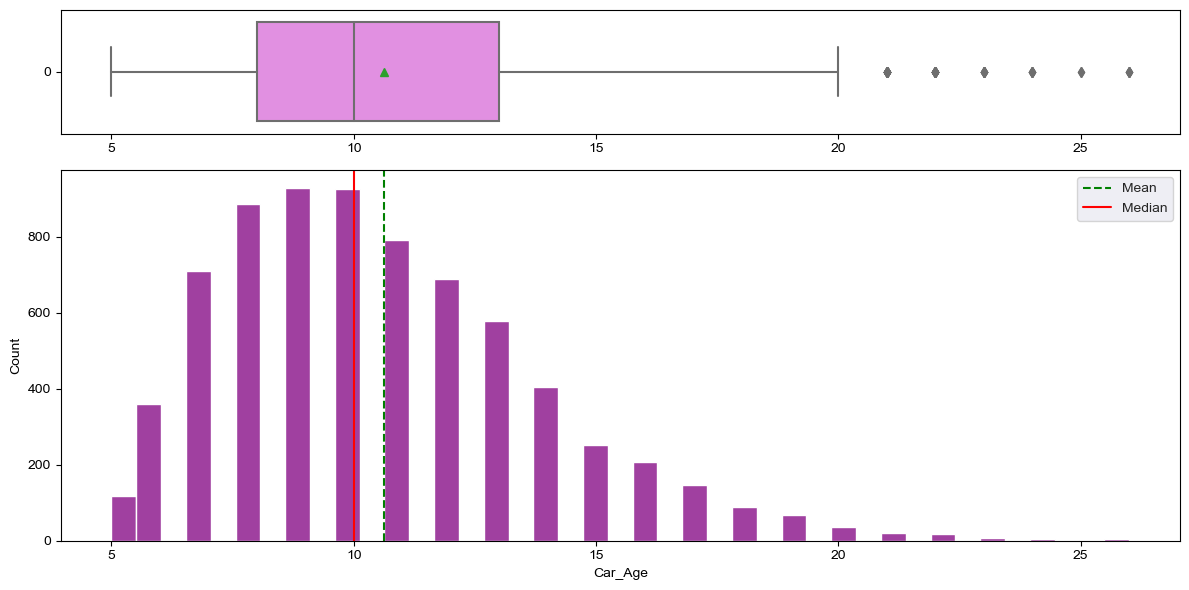

In [59]:
hist_box_plot(car_df['Car_Age'])

* Mean> Median : Year distribytion in positively skewed 
* Very old and latest manufactured cars are not being sold in market. Only the cars made in transition period and have age between 8-12 years are being sold in market agressively.

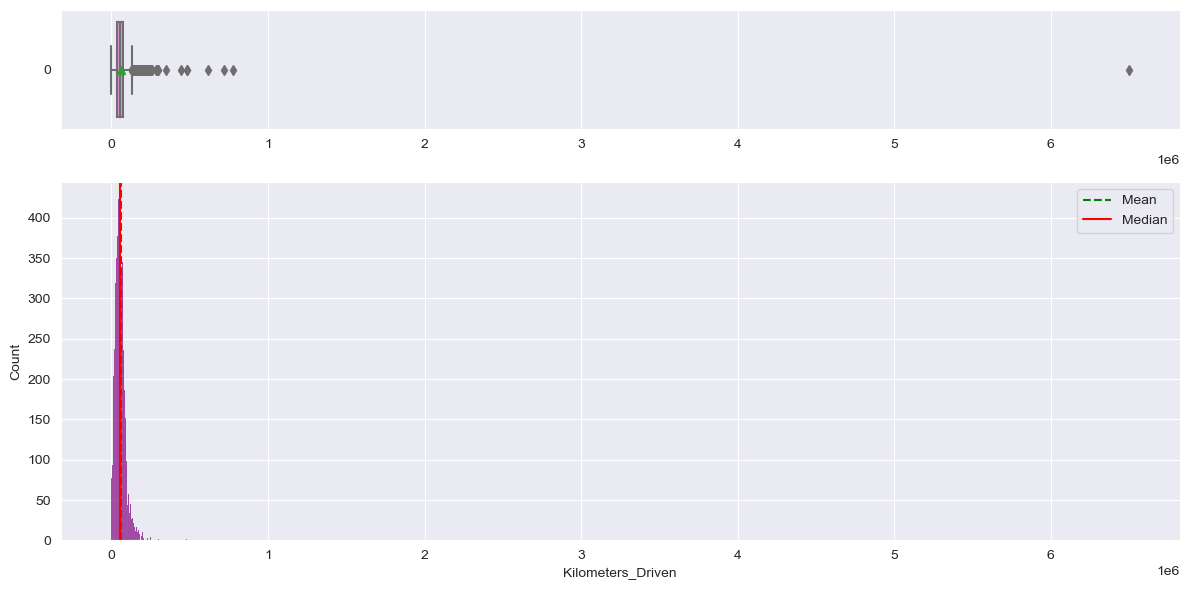

In [60]:
hist_box_plot(car_df['Kilometers_Driven'])

* Highlt positely skewed data for Kilometers_Driven.
* outlier value with kilometers_driven more than 6000000. Require further exploration and log transformation

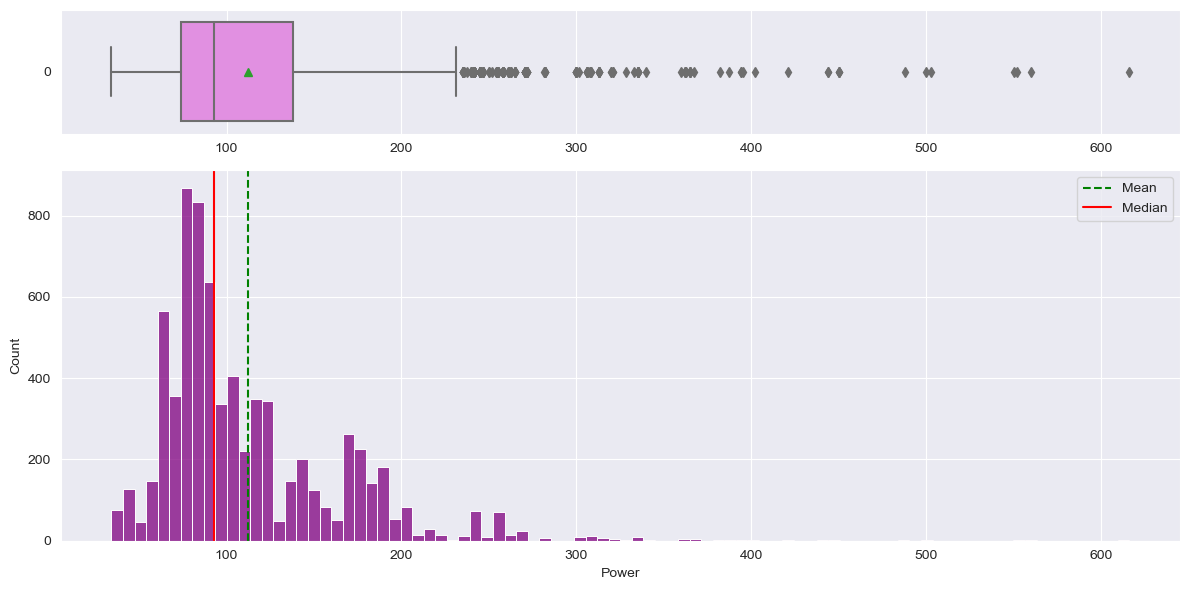

In [61]:
hist_box_plot(car_df['Power'])

* mean> median, Power has few outliers

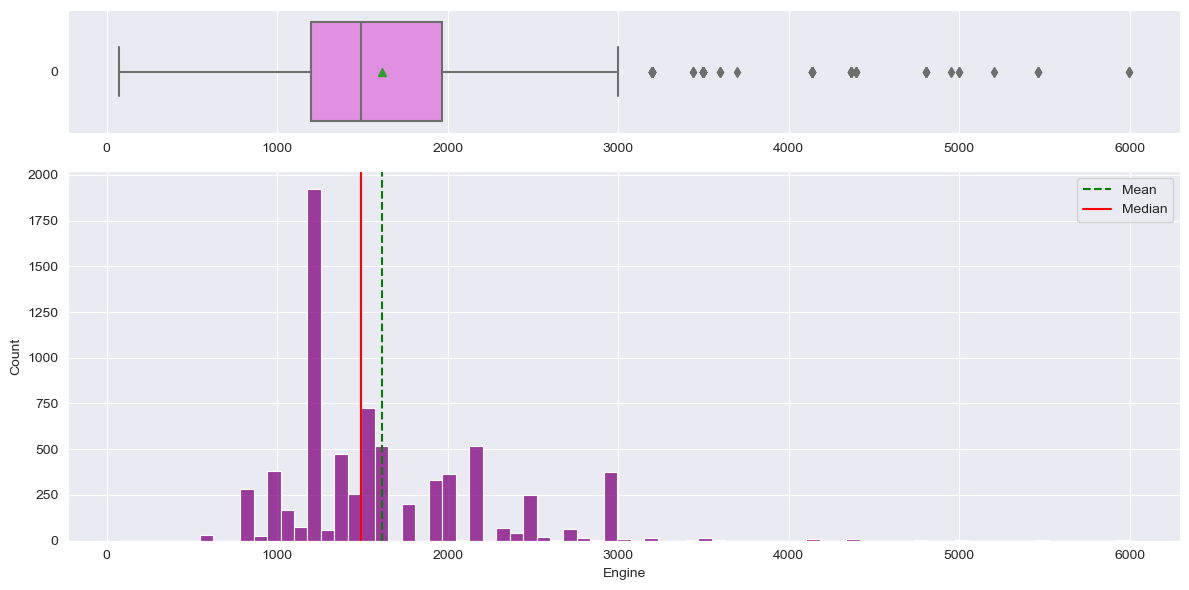

In [62]:
hist_box_plot(car_df['Engine'])

* Mean> median. Most of the cars have engine volume between 1000CC - 2000CC.
* Then, there are cars with around 3000cc engine.
* Few cars have engine volume upto 4000CC, 5000CC and 6000CC. Possibly luxuary cars. need fruther examination

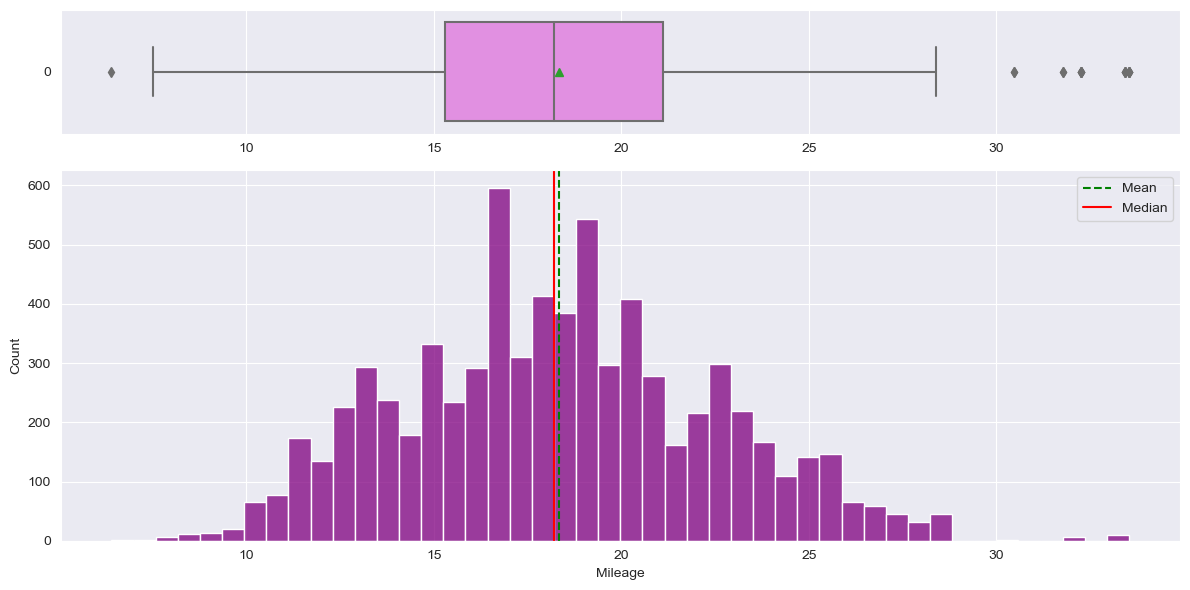

In [63]:
hist_box_plot(car_df['Mileage'])

* Almost normaally distributed. Mean~ Median
* Most of the cars have mileage between 15 to 25. 
* There are few outliers which shows mileage more than 30. Need futher examination

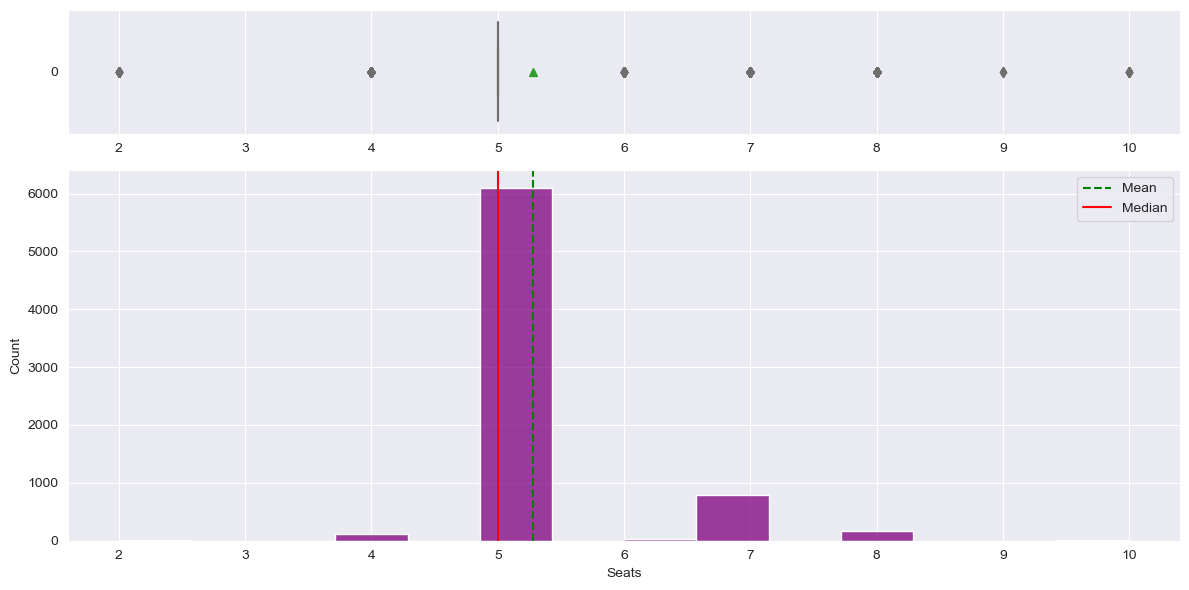

In [64]:
hist_box_plot(car_df['Seats'])

* Almost all cars are 5 seater. Then there are cars with 7 seater.

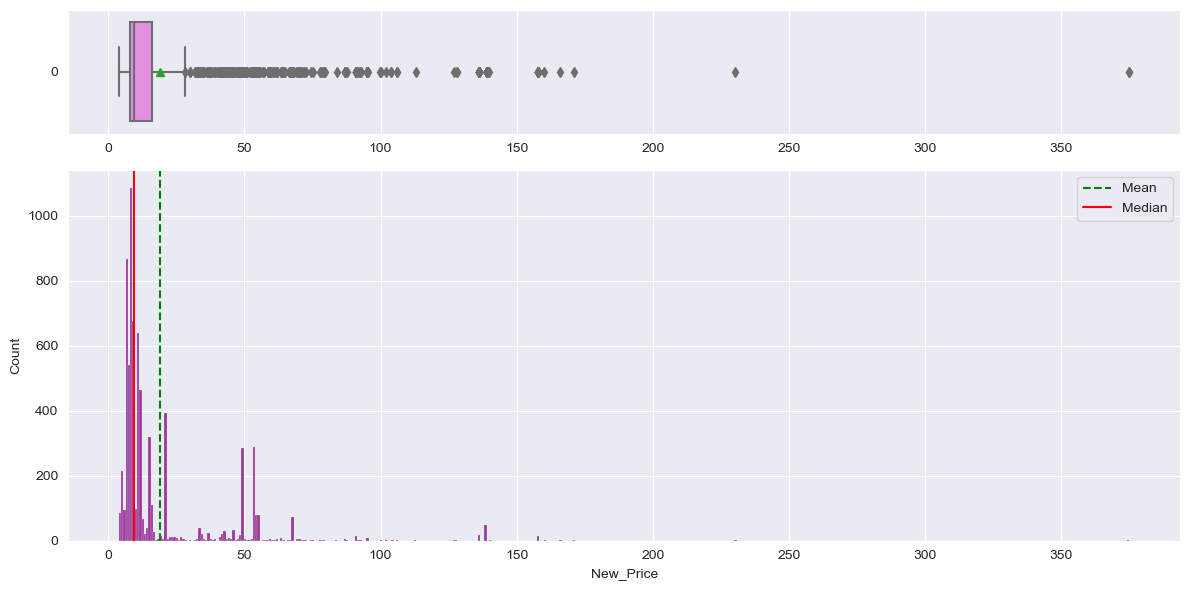

In [65]:
hist_box_plot(car_df['New_Price'])

* Highly poistively skewed. Require log transfromation

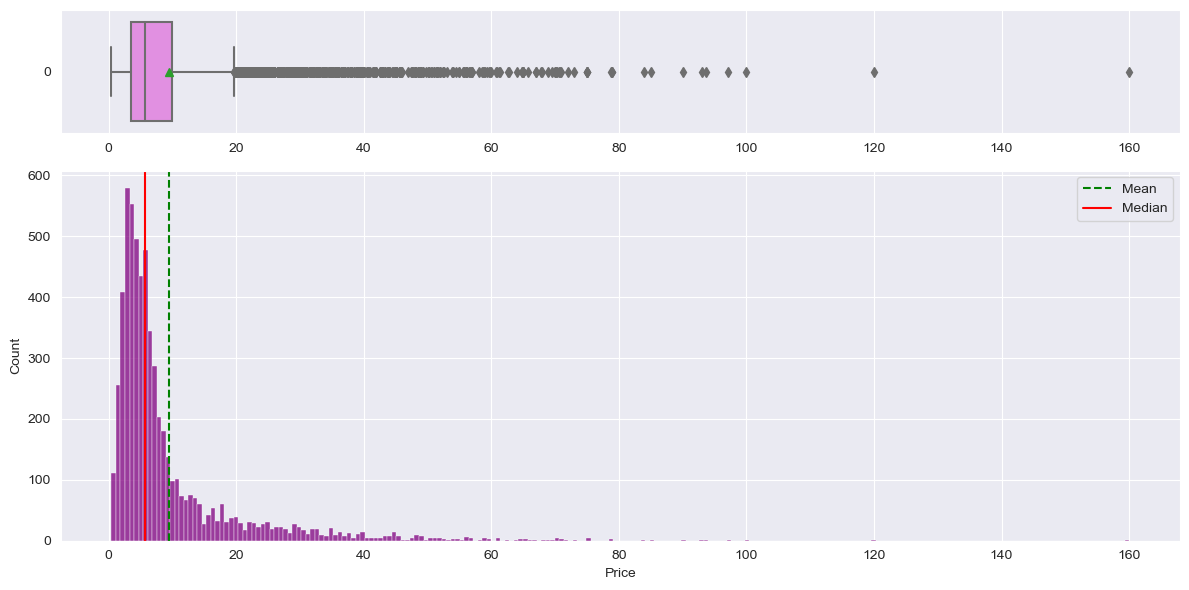

In [66]:
hist_box_plot(car_df['Price'])

* Positively skewed. 
* One or more car is sold at 160 lakhs.

In [67]:
# Bar Plot for categorical variables
def bar_plot(data,z):
    total = len(data[z])
    sns.set_style('darkgrid')
    plt.figure(figsize =(12,6))
    ax = sns.countplot(x = data[z], palette = 'coolwarm',order = data[z].value_counts(ascending = False).index)
    plt.xticks(rotation=45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)
        
        x = p.get_x() + p.get_width()/ 2-.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  

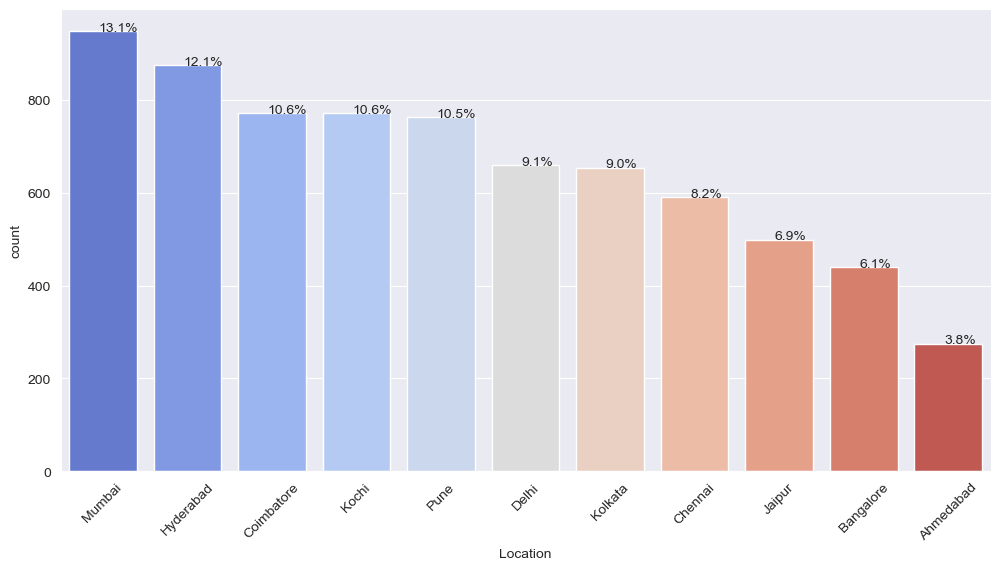

In [68]:
bar_plot(car_df,'Location')

* Most of the cars are sold in Mumbai, Hyderabad, Coimbatore, Kochi and Pune.
* Ahemdabad has least numbe of car sold, followed by Banglore

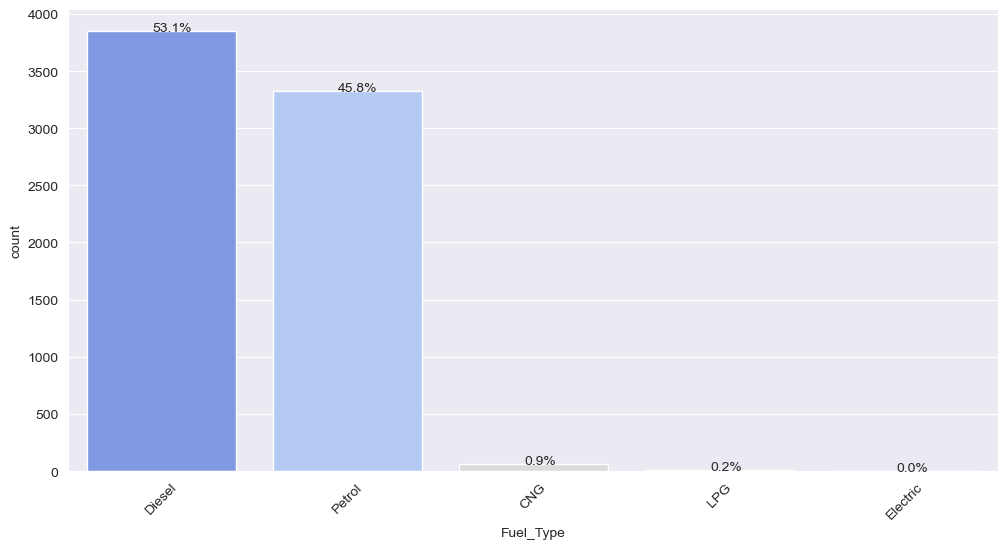

In [69]:
bar_plot(car_df,'Fuel_Type')

* More than 50% of the cars sold are of Diesel type, followed by Petrol.
* % of Electric car sold is negligible 

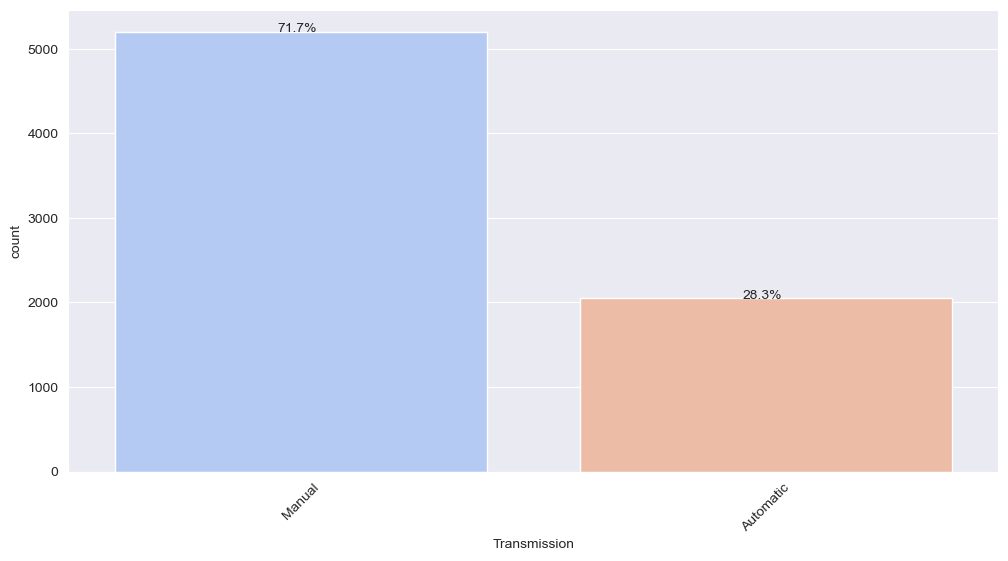

In [70]:
bar_plot(car_df,'Transmission')

* More than 70% of the cars are Manual type.

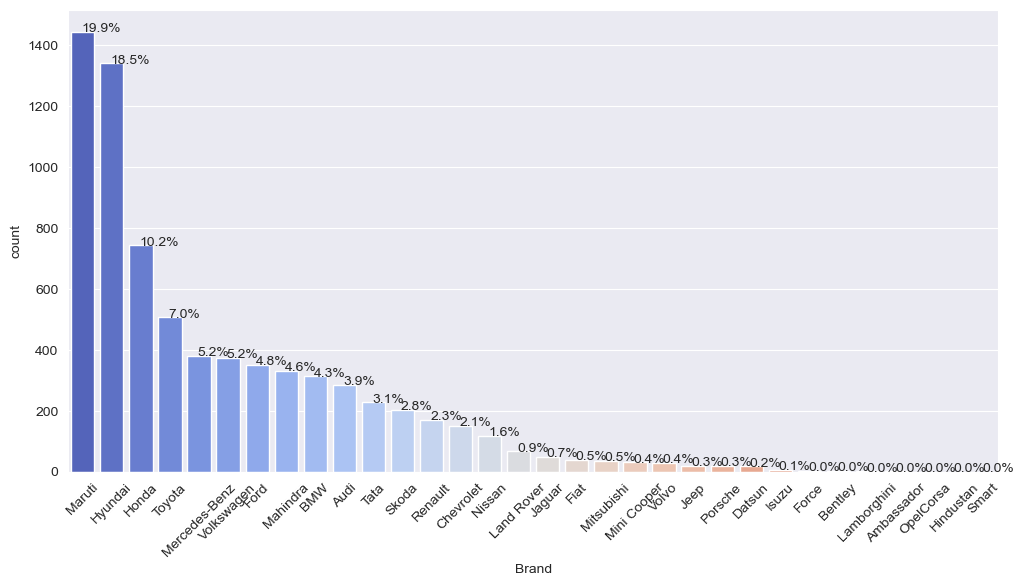

In [71]:
bar_plot(car_df,'Brand')

* Maruti, Hyundai and Honda are Top 3 brand sold.
* Ambasdos, Hindustani, Lamborgini, smart and OpelCors are the least sold

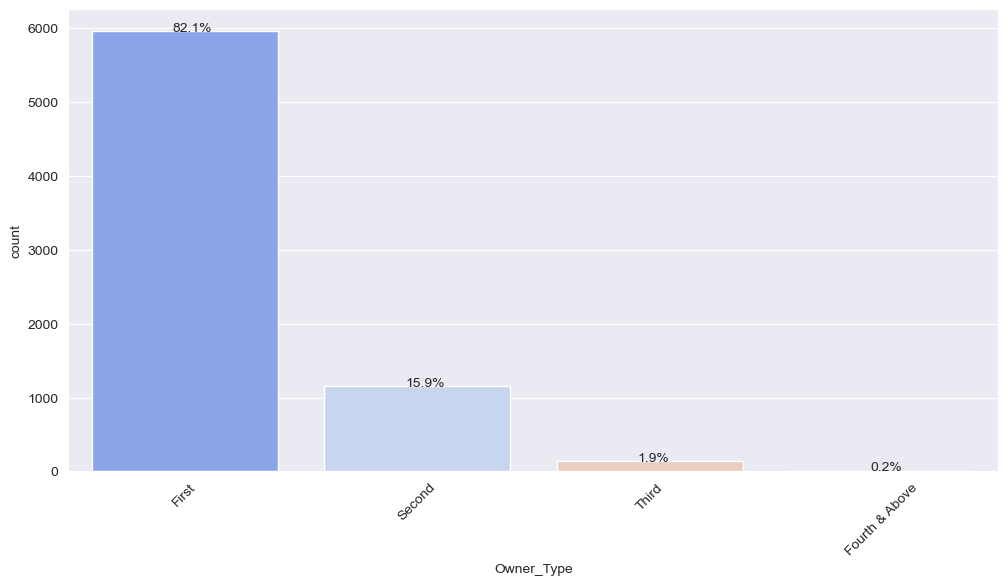

In [72]:
bar_plot(car_df,'Owner_Type')

* More than 80% of the car being sold Firs time after fresh purchse
* Car sold being sold for the forth time and more is have negligible demand in market

# Bivariate Analysis

In [73]:
car_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             156
Price                1231
Brand                   0
Model                   0
Car_Age                 0
dtype: int64

* Price is dependent variable in this study. Therefore we will try to find correlation of Price with features

In [74]:
car_df.dtypes

Location             category
Year                    int32
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
Brand                category
Model                category
Car_Age                 int32
dtype: object

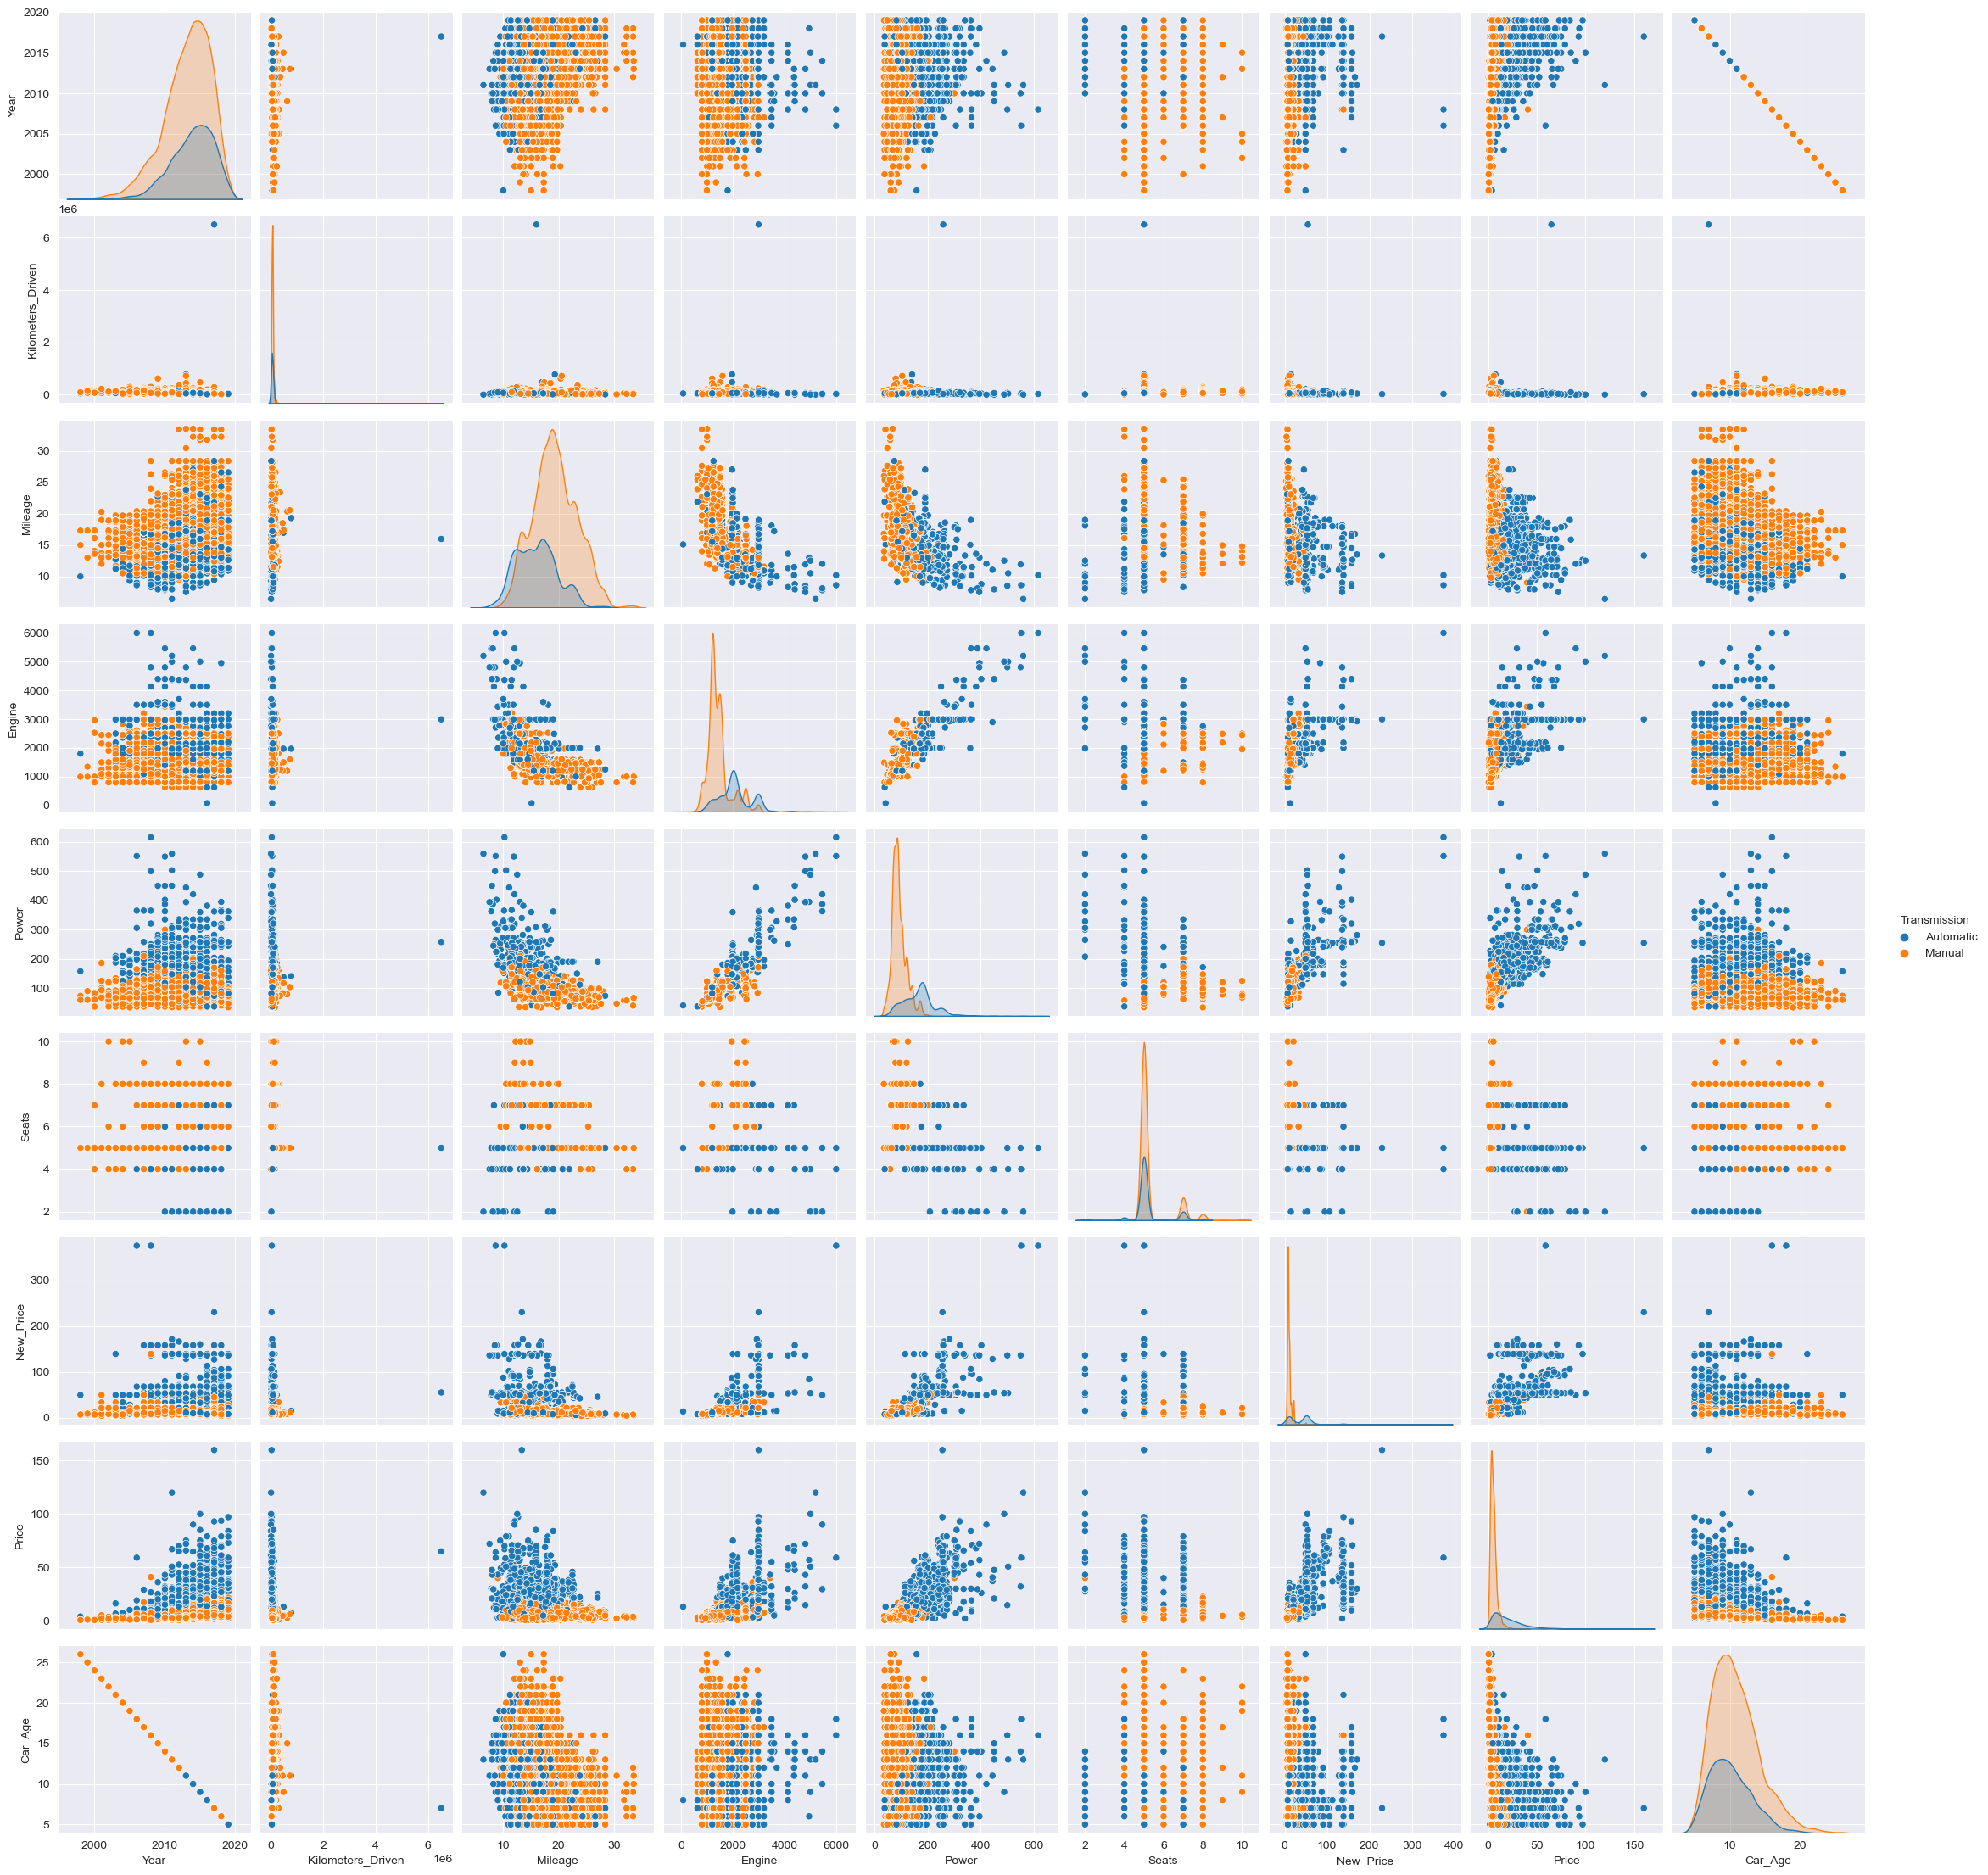

In [75]:
sns.pairplot(car_df, hue='Transmission')
plt.show()

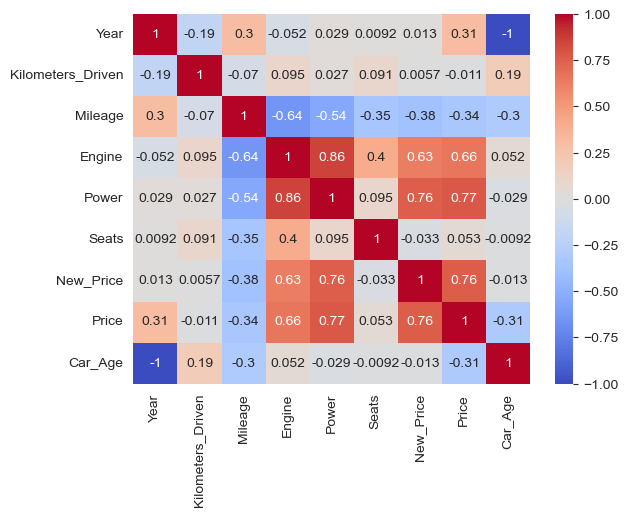

In [76]:
non_numeric_cols = car_df.select_dtypes(include=['category']).columns
df_numeric = car_df.drop(columns=non_numeric_cols)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## From above correlation matrix, following can be concluded.
### Positive Correlation:
 * Power- Engine
 * Price - Engine
 * Price- Power
 * New_Price - Power
 * New_Price - Engine
 * Price - New_Price

### Negative Correlation
 * Mileage - Power
 * Mileage - Engine
 

* Now let's check price relationship with categorical variable

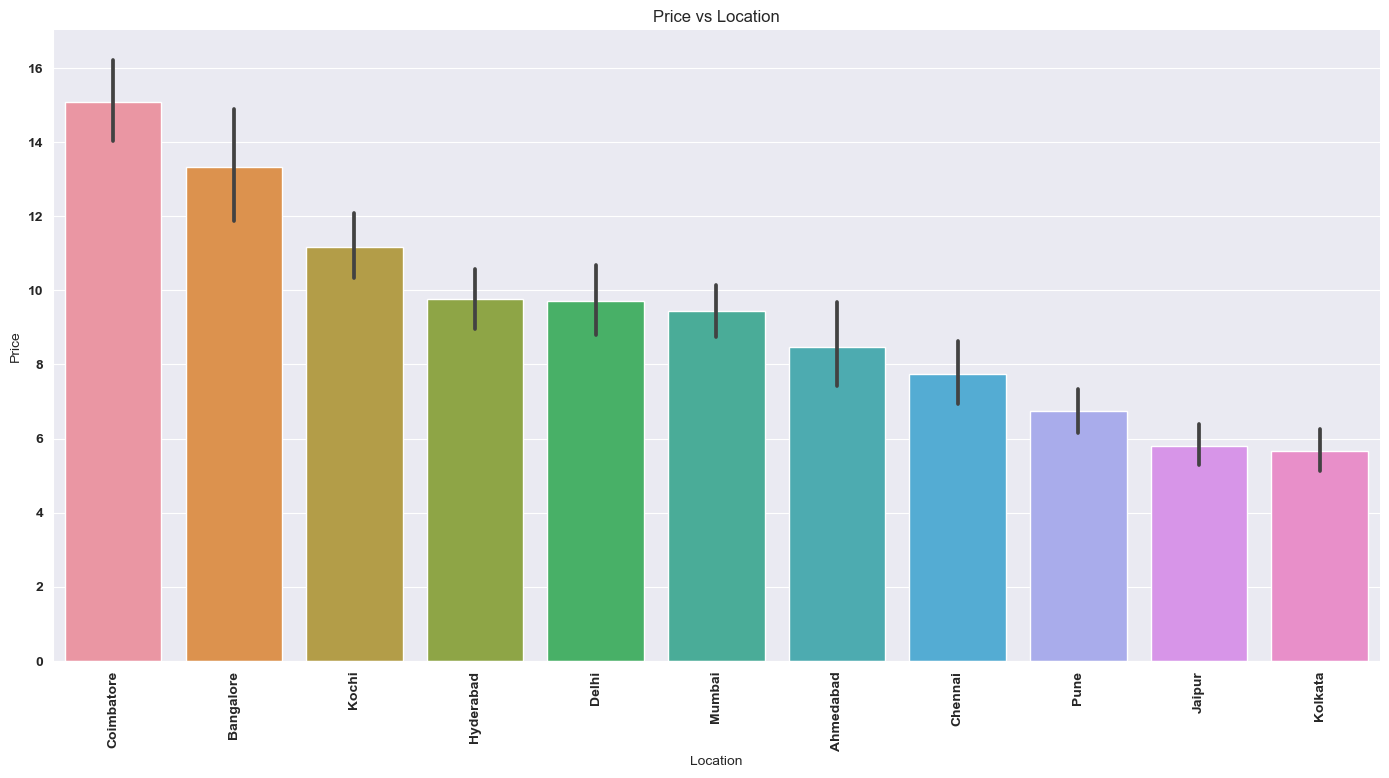

In [77]:
order = car_df.groupby(['Location'])['Price'].mean().fillna(0).sort_values(ascending=False).index
# Creating a bar plot with sorted order
sns.catplot(x="Location", y="Price", data=car_df, kind='bar', height=7, aspect=2, order=order).set(title='Price vs Location')
# Rotating x-axis labels for better readability
plt.xticks(rotation=90, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show()

### Price vs Location Observation
    * Used Cars are costly in Coimbatore, Bangalore , Kochi.
    * Used Cars are cheapest in Kolkata, Jaipur, Pune.

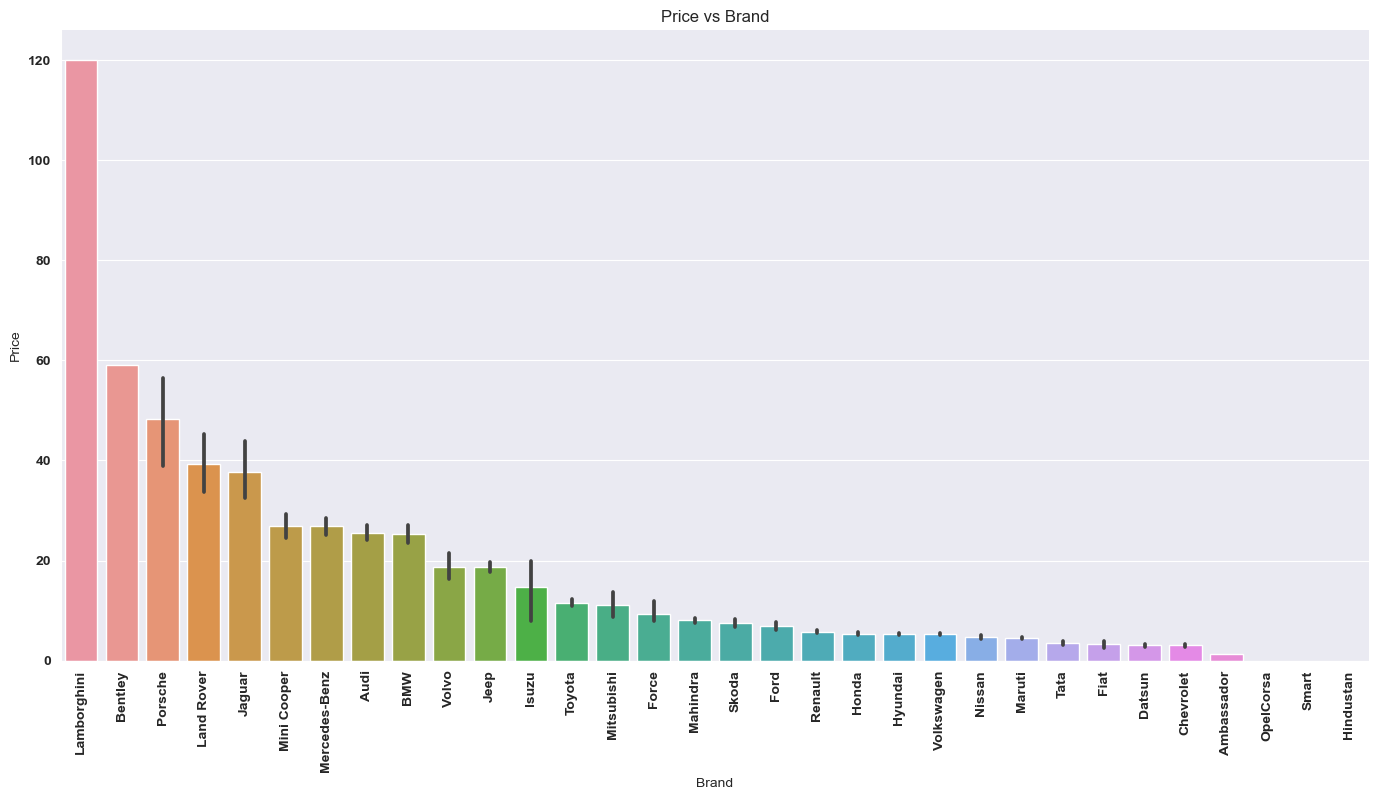

In [78]:
order = car_df.groupby(['Brand'])['Price'].mean().fillna(0).sort_values(ascending=False).index
# Creating a bar plot with sorted order
sns.catplot(x="Brand", y="Price", data=car_df, kind='bar', height=7, aspect=2, order = order).set(title='Price vs Brand')
# Rotating x-axis labels for better readability
plt.xticks(rotation=90, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show()

### Brand vs Price Obsevation
   * Most expesinve car brand is Lamborghini, followed by Bently, Porsches, Land Rover and Jaguar.
   * Least expenisnve car brand is Hindustan, followed by Smart, OpelCorsa, Ambassador

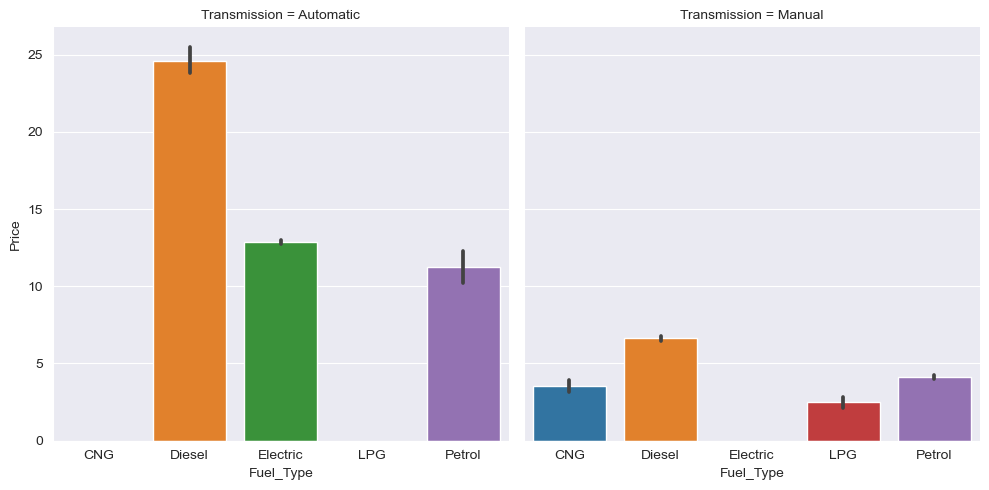

In [79]:
sns.catplot(x="Fuel_Type",y="Price",col="Transmission",data=car_df,kind='bar') 
plt.show()

* CNG and LPG fuel type cars tennd to be manual and Electric cars tend to be automatic.
* Automatic transmission type cars are more costlier than manula transmission type.

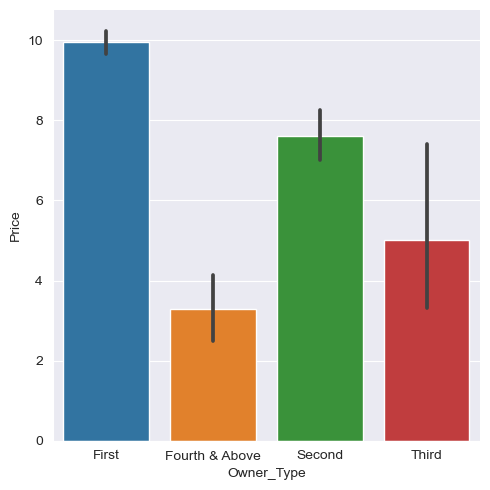

In [80]:
sns.catplot(x="Owner_Type",y="Price",data=car_df,kind='bar') 
plt.show()

* Price of car falls as it is transfred to owners mutiple times.
* First owner of the car( car that is being purchsed freshly from agency and now it is up for sale) have highest price quoted value.
* cars those are sold four and moretimes are cheapest.

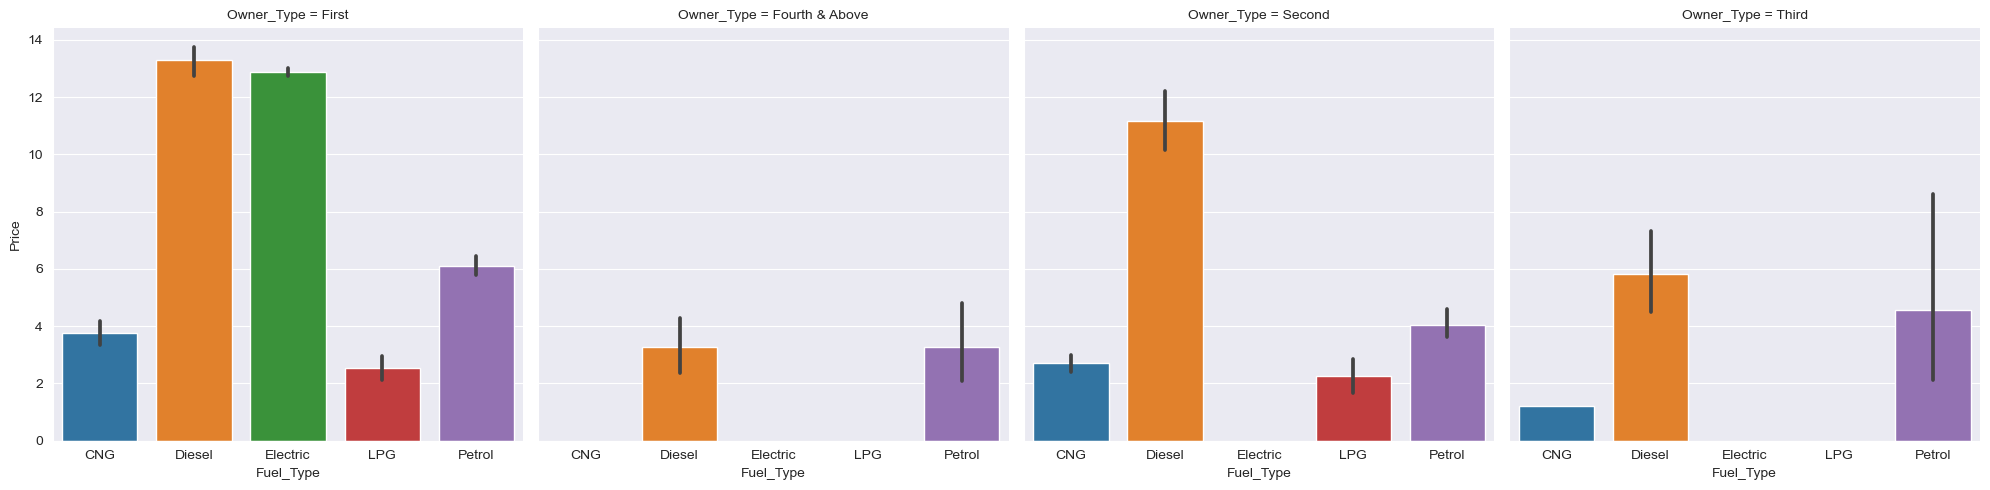

In [81]:
sns.catplot(x="Fuel_Type",y="Price",col="Owner_Type",data=car_df,kind='bar') 
plt.show()

* Ownership of electric cars is generally being transferred only for one time.
* Prices of all fuel type cars falls with increas in number of instsance of ownership transfer.

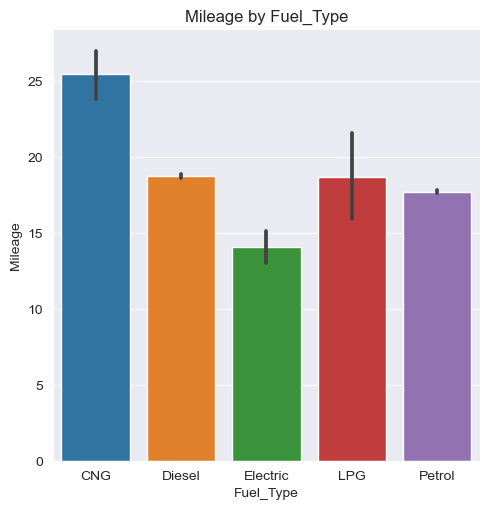

In [82]:
sns.catplot(x="Fuel_Type",y="Mileage",data=car_df,kind='bar').set(title = 'Mileage by Fuel_Type')
plt.show()

* CNG cars provides better mileage, followed by LPG and Diesel.
* Electrci cars do not provide good mileage comared to rest of the fuel type vehicles.

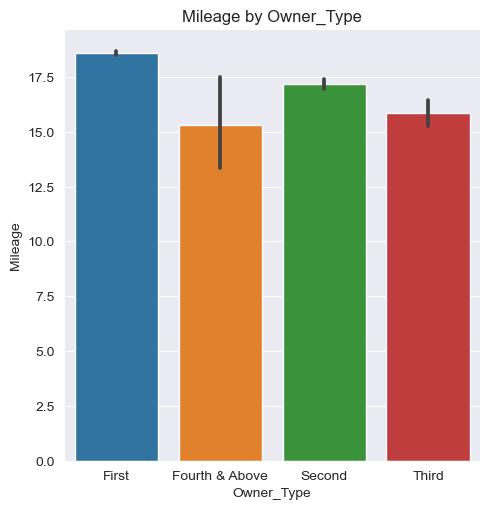

In [83]:
sns.catplot(x="Owner_Type",y="Mileage",data=car_df,kind='bar').set(title = 'Mileage by Owner_Type')
plt.show()

* Car Mileage reduces as it is transferred multiple times, as expected.

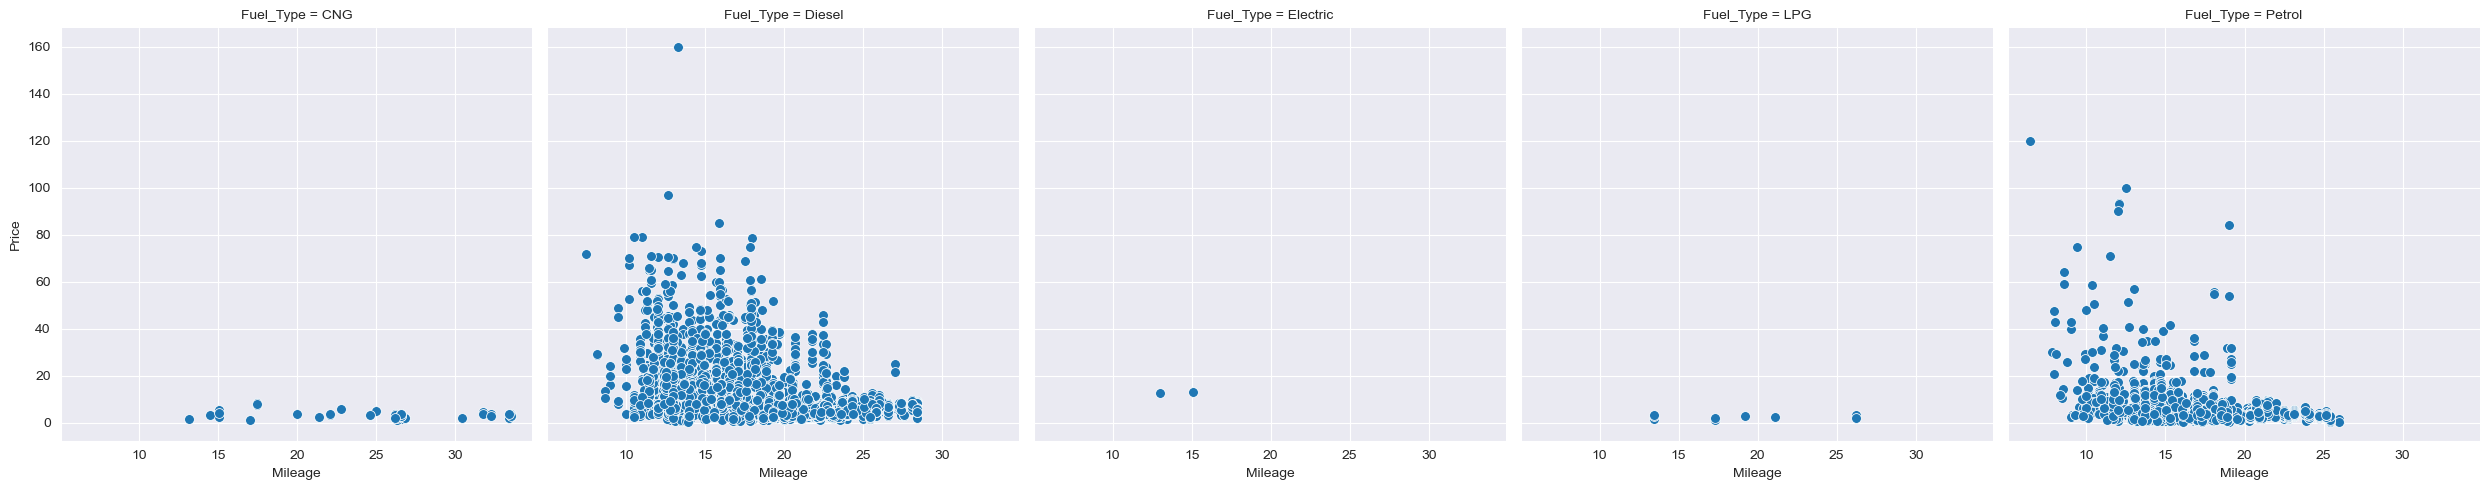

In [84]:
sns.relplot(x = 'Mileage', y = 'Price', col = 'Fuel_Type',data = car_df, s = 50)
plt.show()

* Most of the CNG and LPG cars have low price and high mileage range.
* Most of the Petrol cars have low mileage range and Low price.
* Most of the Diesel cars have low mileage range and High too.
* Electric  cars are of low mileage rnage and low price too.
* Few recods for fuel type petrol and diesel have high price and low mileage, which is generally true for luxury cars.

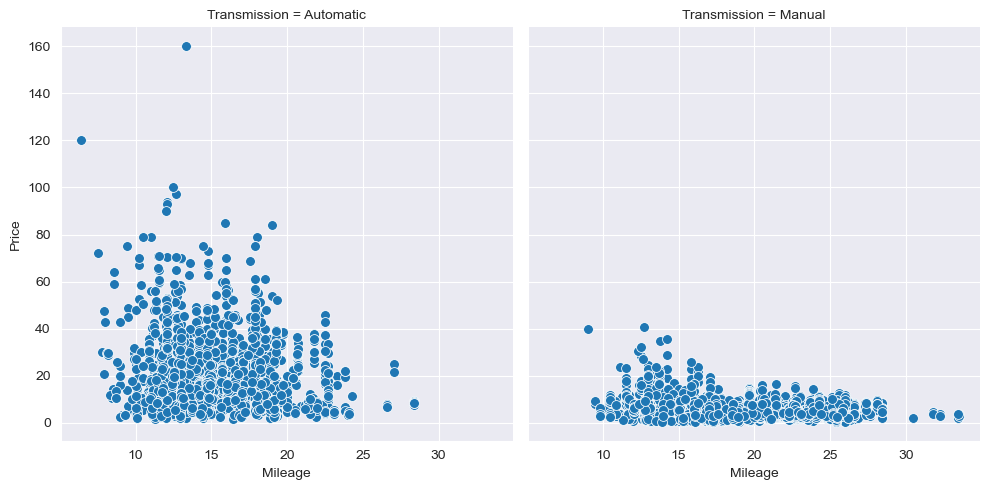

In [85]:
sns.relplot(x = 'Mileage', y = 'Price', col = 'Transmission',data = car_df, s = 50)
plt.show()

* Automatic cars mileage range is less than manual cars mileage range.
* For same milegae automatic cars tends to be expensive than manual cars.

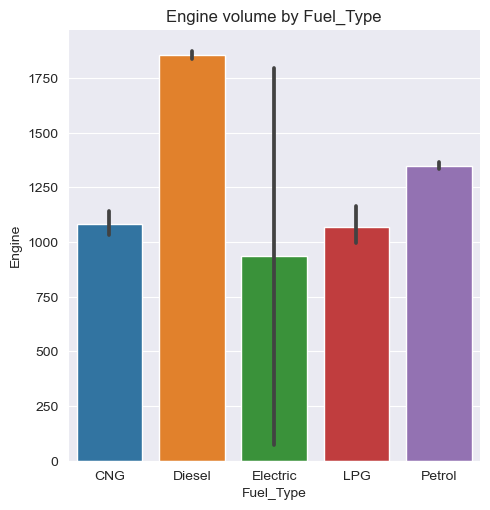

In [86]:
sns.catplot(x="Fuel_Type",y="Engine",data=car_df,kind='bar').set(title = 'Engine volume by Fuel_Type')
plt.show()

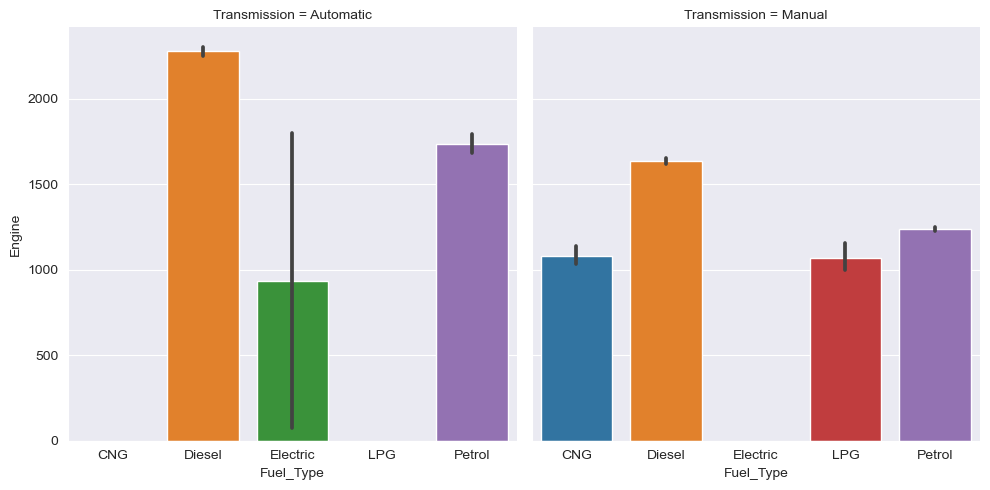

In [87]:
sns.catplot(x="Fuel_Type",y="Engine",col = 'Transmission',data=car_df,kind='bar')
plt.show()

* Diesel engines tend to have higher volumne, followed by petrol and CNG & LPG.

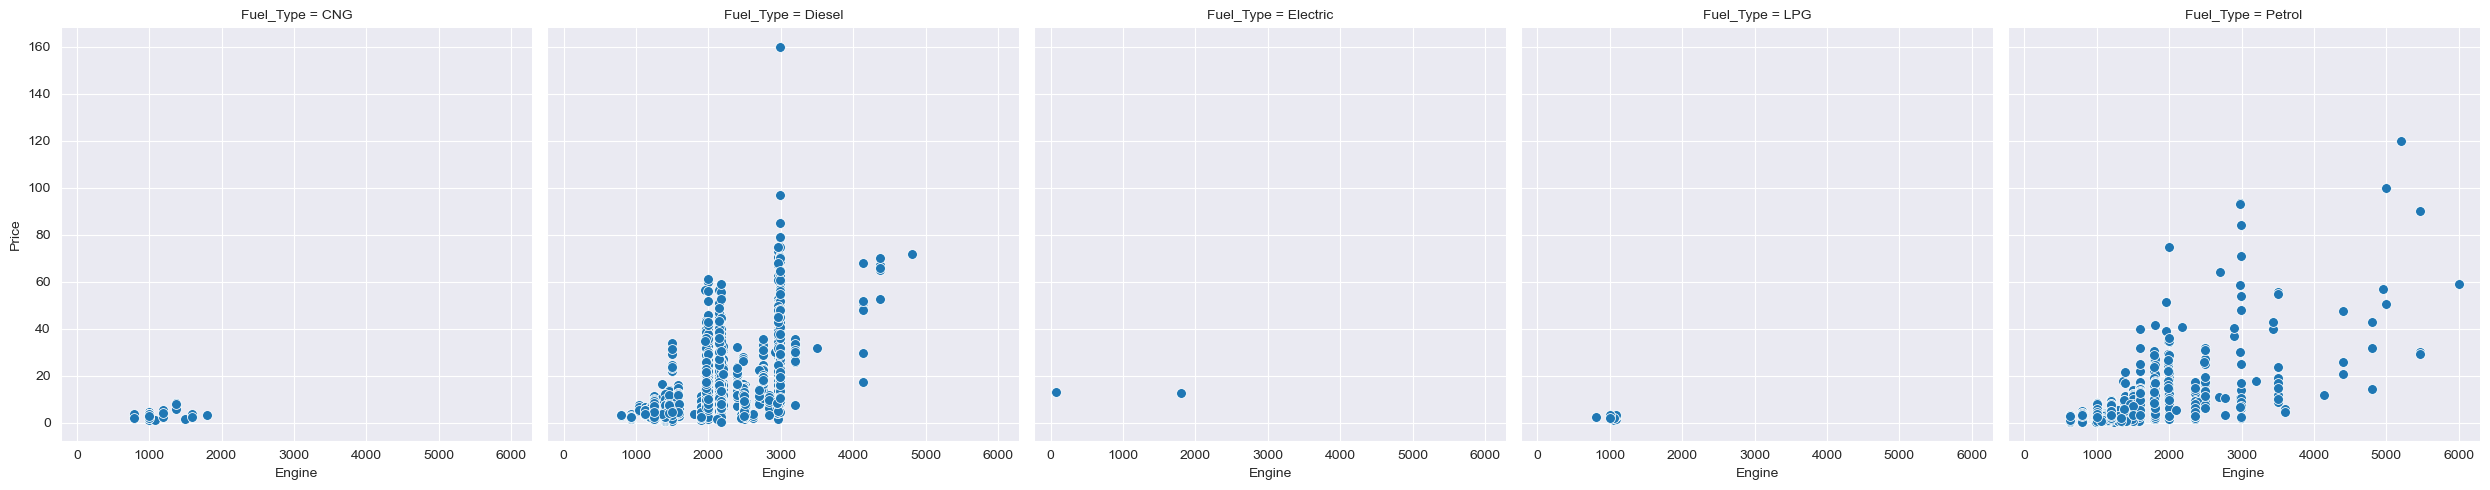

In [88]:
sns.relplot(x = 'Engine', y = 'Price', col = 'Fuel_Type',data = car_df, s = 50)
plt.show()

* As per volume of engine, price of CNG, LPG and Electric cars is roughly constant.
* For diesel and detrol cars, higher engine volume cars tend to be expensive.

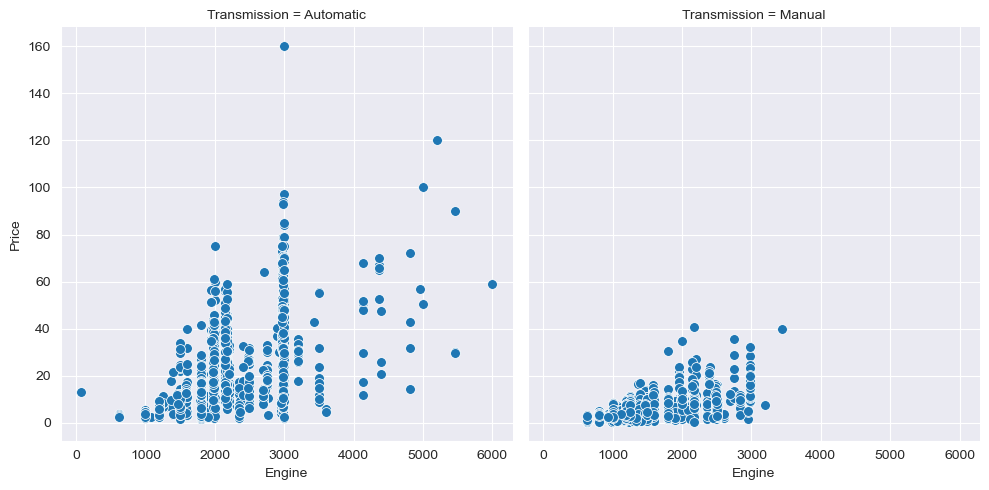

In [89]:
sns.relplot(x = 'Engine', y = 'Price', col = 'Transmission',data = car_df, s = 50)
plt.show()

* Automatic cars are more expensive than manual transmission car even for same volume of engine.

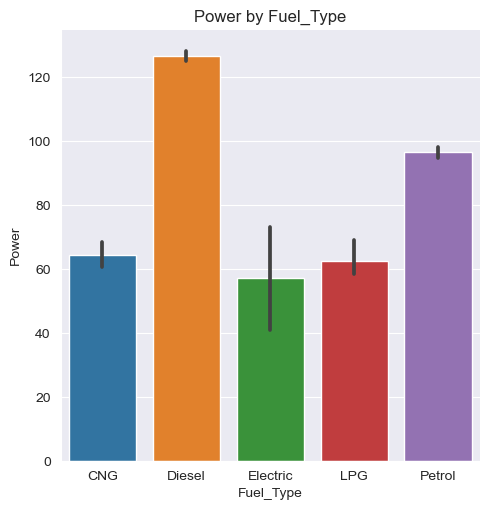

In [90]:
sns.catplot(x="Fuel_Type",y="Power",data=car_df,kind='bar').set(title = 'Power by Fuel_Type')
plt.show()

* Diesel and petrol fuel type cars can deliver higher power.
* Power delivered by CNG and LPG fuel type cars is almost same and lesser than diesel and petrol.
* Power delivered by Electric cars is lowest among all categories.

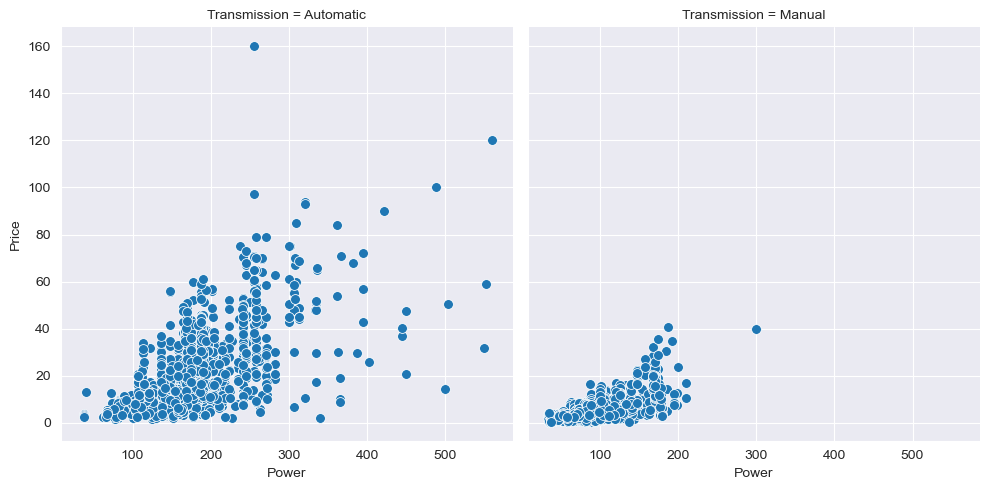

In [91]:
sns.relplot(x = 'Power', y = 'Price', col = 'Transmission',data = car_df, s = 50)
plt.show()

* Most of the manual cars have power less than 250 bhp, while automatic cars have higher power range.

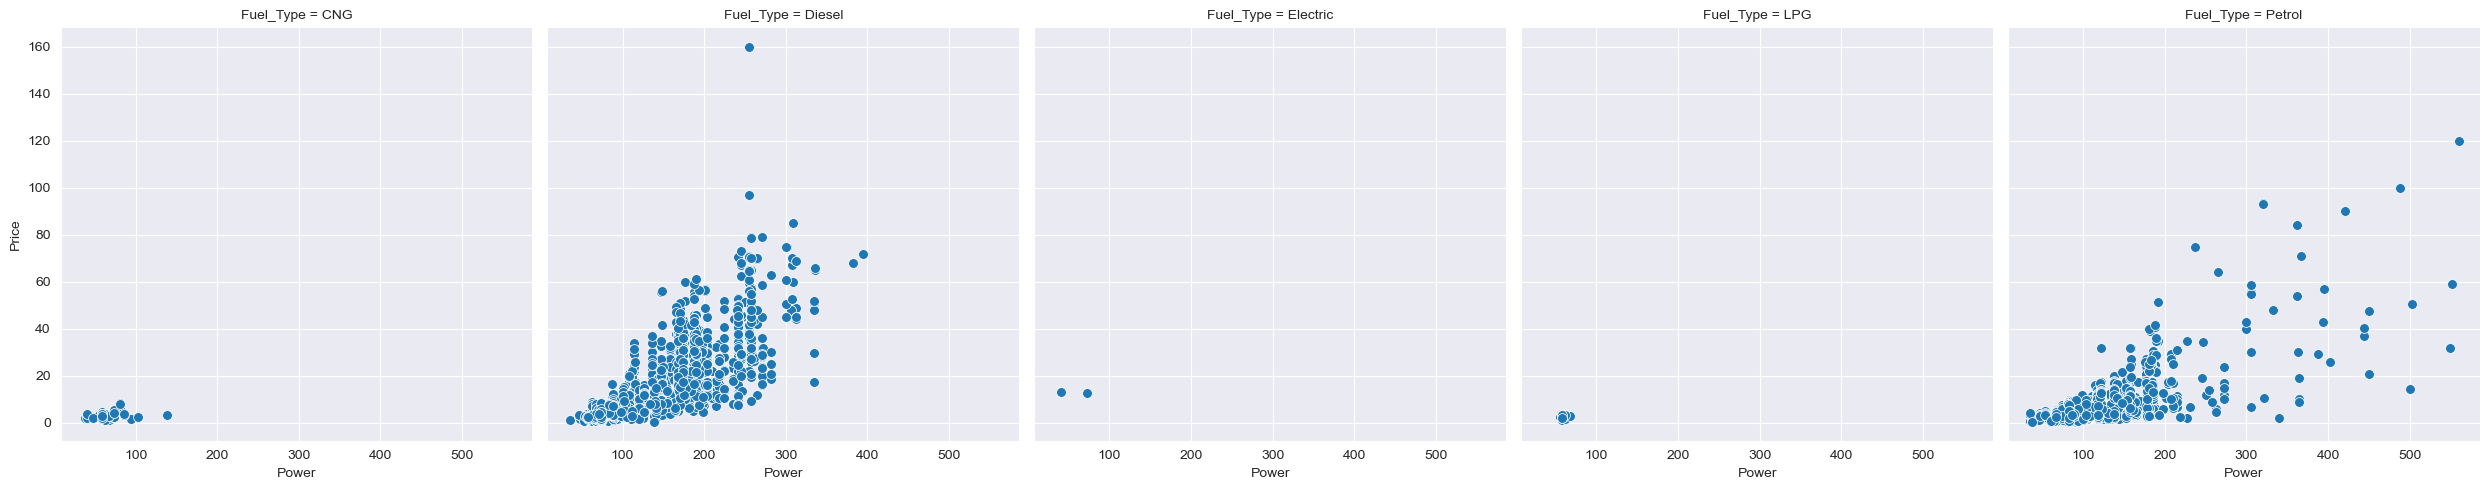

In [92]:
sns.relplot(x = 'Power', y = 'Price', col = 'Fuel_Type',data = car_df, s = 50)
plt.show()

* As per power delivered by vehicle, price of CNG, LPG and Electric cars is roughly constant.
* For diesel and detrol cars, higher power cars tend to be expensive.

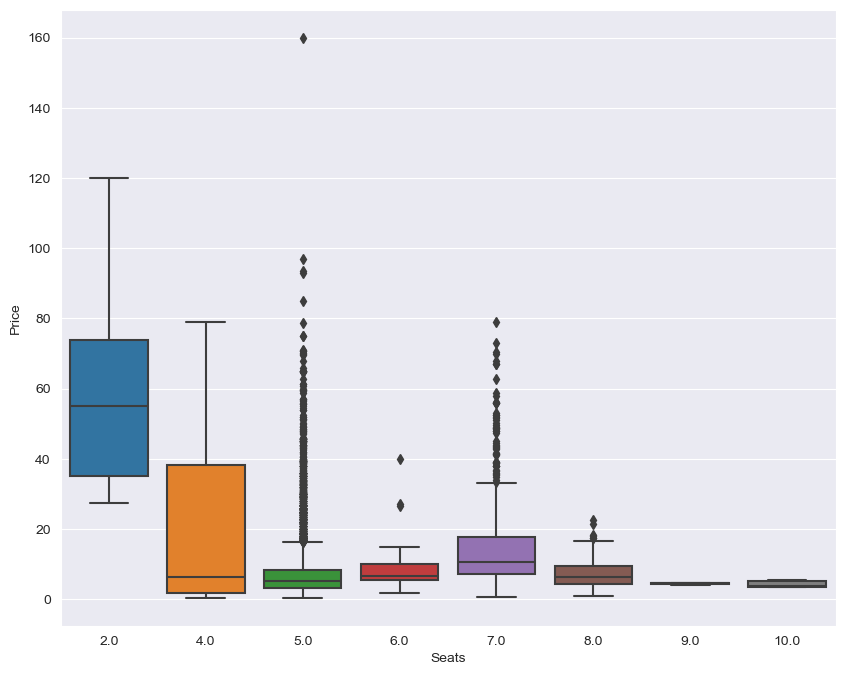

In [93]:
plt.figure(figsize = (10,8))
sns.boxplot(y="Price", x="Seats",data=car_df)
plt.show()

* Car with 2 seats are most expensive.
* Cars with 4 seats have higher price range but average price is as same as cars with 5 and 6  and 8 seats.
* Cars with 5 seats have higest number of price outlier values.

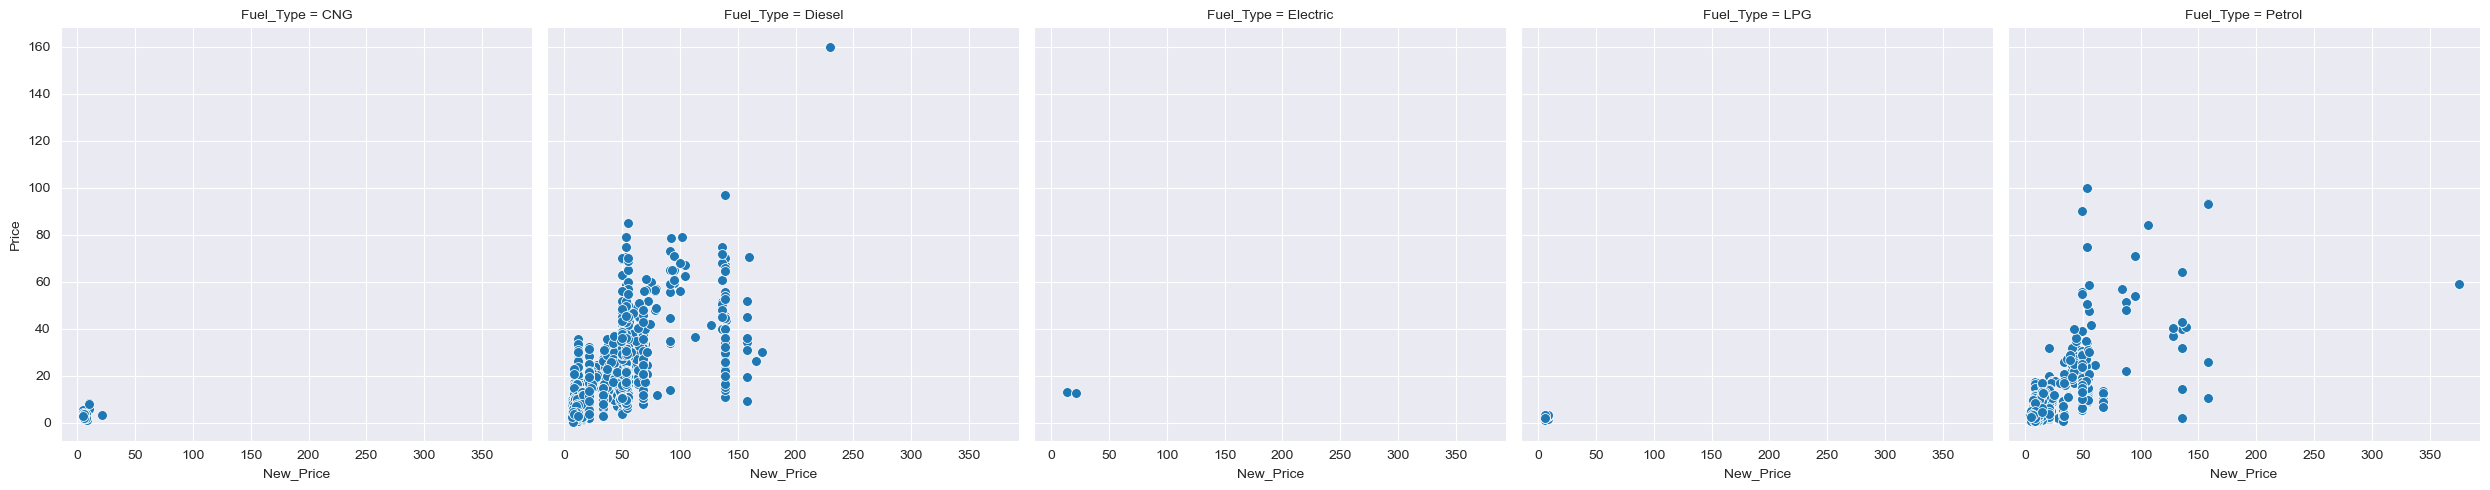

In [94]:
sns.relplot(x = 'New_Price', y = 'Price', col = 'Fuel_Type',data = car_df, s = 50)
plt.show()

# Location wise car brand sold mostly.

<Figure size 1200x800 with 0 Axes>

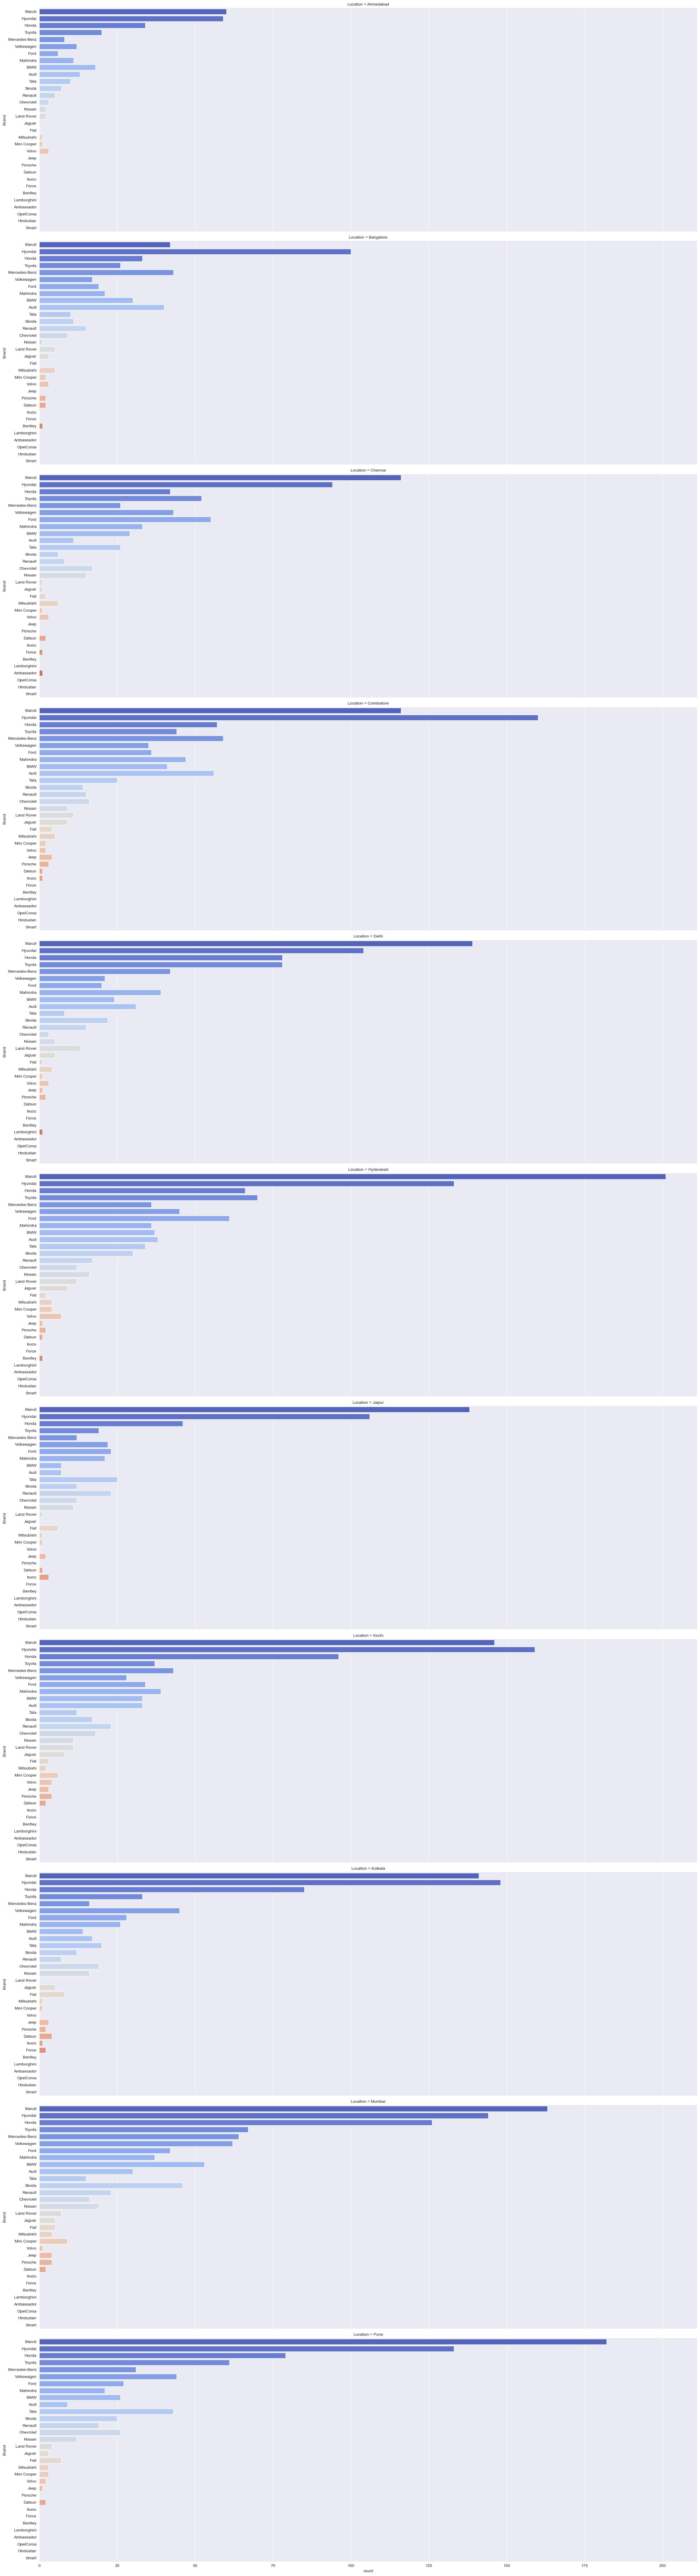

In [95]:
plt.figure(figsize =(12,8))
sns.catplot(data=car_df, y="Brand", kind='count', height=8, aspect=3 ,row="Location",
              palette="coolwarm",
              order = car_df["Brand"].value_counts(ascending=False).index
           )
plt.show()

## Location specific mean price of each car brand.

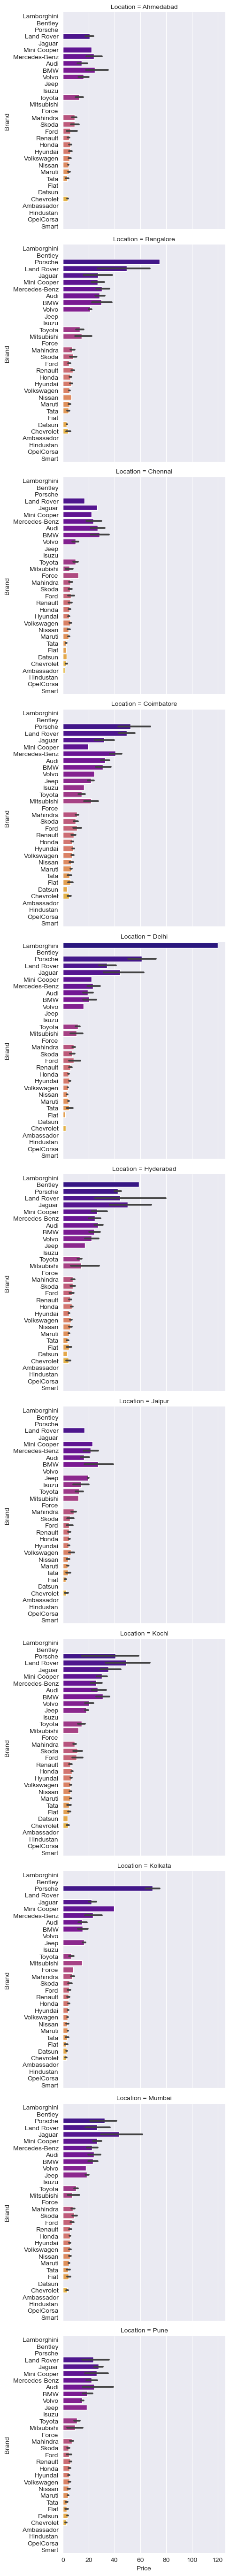

In [96]:
g = sns.catplot(x="Price",y="Brand",data=car_df,kind='bar', row = 'Location', 
            palette = 'plasma',
           order = car_df.groupby(['Brand'])['Price'].mean().sort_values(ascending = False).index)
plt.show()

# Intra city comperision of mean price for each brand for all brands


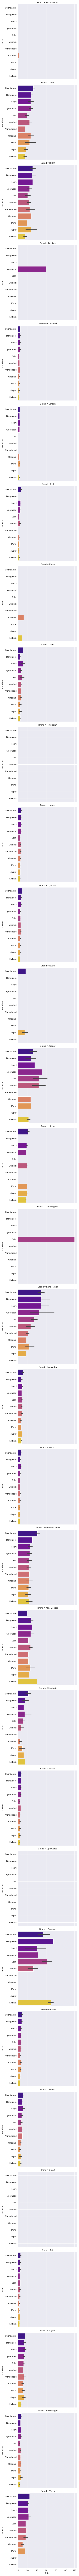

In [97]:
sns.catplot(x="Price",y="Location",data=car_df,kind='bar', row = 'Brand', 
            palette = 'plasma',
           order = car_df.groupby(['Location'])['Price'].mean().sort_values(ascending = False).index)
plt.show()

<Axes: xlabel='Year', ylabel='Price'>

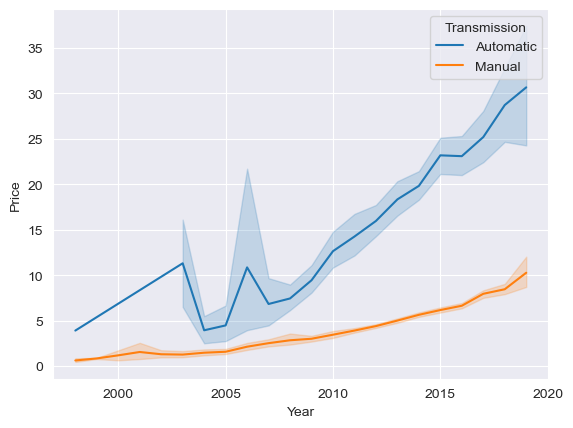

In [98]:
sns.lineplot(x= 'Year',y ='Price', hue = 'Transmission', data = car_df)

### Variable Transformation : Log Transformation 

##### Based on EDA : We have seen that data contains columns which are skewed and have outlier. For that, we need to apply log transformation befor model bulding.

In [99]:
car_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             156
Price                1231
Brand                   0
Model                   0
Car_Age                 0
dtype: int64

In [100]:
car_df.shape

(7249, 15)

### Price is dependent variable in this study, thus imputing this value using mean and median would affect the acuuracy of model. Thus it is better to drop the rows with missing values.

In [101]:
car_df.dropna(inplace = True, axis =0)
print('Shape of dataset after dropping missing values:',car_df.shape)

Shape of dataset after dropping missing values: (5892, 15)


<Axes: >

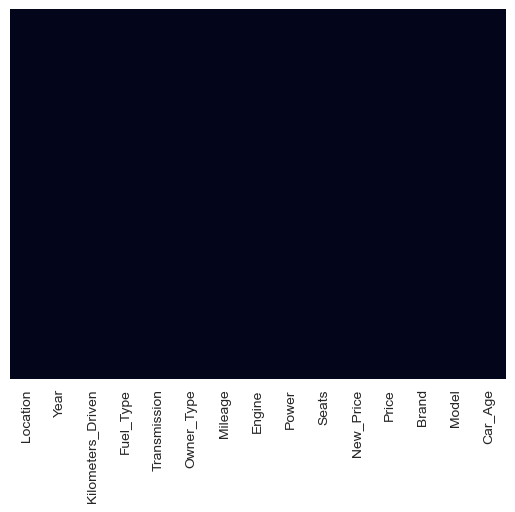

In [102]:
sns.heatmap(car_df.isnull(), yticklabels= False, cbar = False)

#### No Missing value in dataset

###### Columns : Kilometers_Driven, New_Price and Price are higly skewed and have outliers. Therefore before perfroming log transformation on them, we need to check whether these columns contain any negative value.

In [103]:
print('Kilometers_Driven with value<=0:', car_df[car_df['Kilometers_Driven']<=0.0].count().sum())
print('New_Price with value<=0:', car_df[car_df['New_Price']<=0.0].count().sum())
print('Price with value<=0:', car_df[car_df['Price']<=0.0].count().sum())

Kilometers_Driven with value<=0: 0
New_Price with value<=0: 0
Price with value<=0: 0


In [104]:
car_df_copy = car_df.copy(deep = True)
def log_transformer(df,cols):
    for column in cols:
        df[column + '_log'] = np.log(df[column])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [105]:
log_transformer(car_df, ['Kilometers_Driven','Price','New_Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 5892 entries, 0 to 6016
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5892 non-null   category
 1   Year                   5892 non-null   int32   
 2   Kilometers_Driven      5892 non-null   int64   
 3   Fuel_Type              5892 non-null   category
 4   Transmission           5892 non-null   category
 5   Owner_Type             5892 non-null   category
 6   Mileage                5892 non-null   float64 
 7   Engine                 5892 non-null   float64 
 8   Power                  5892 non-null   float64 
 9   Seats                  5892 non-null   float64 
 10  New_Price              5892 non-null   float64 
 11  Price                  5892 non-null   float64 
 12  Brand                  5892 non-null   category
 13  Model                  5892 non-null   category
 14  Car_Age                5892 non-null   int32 

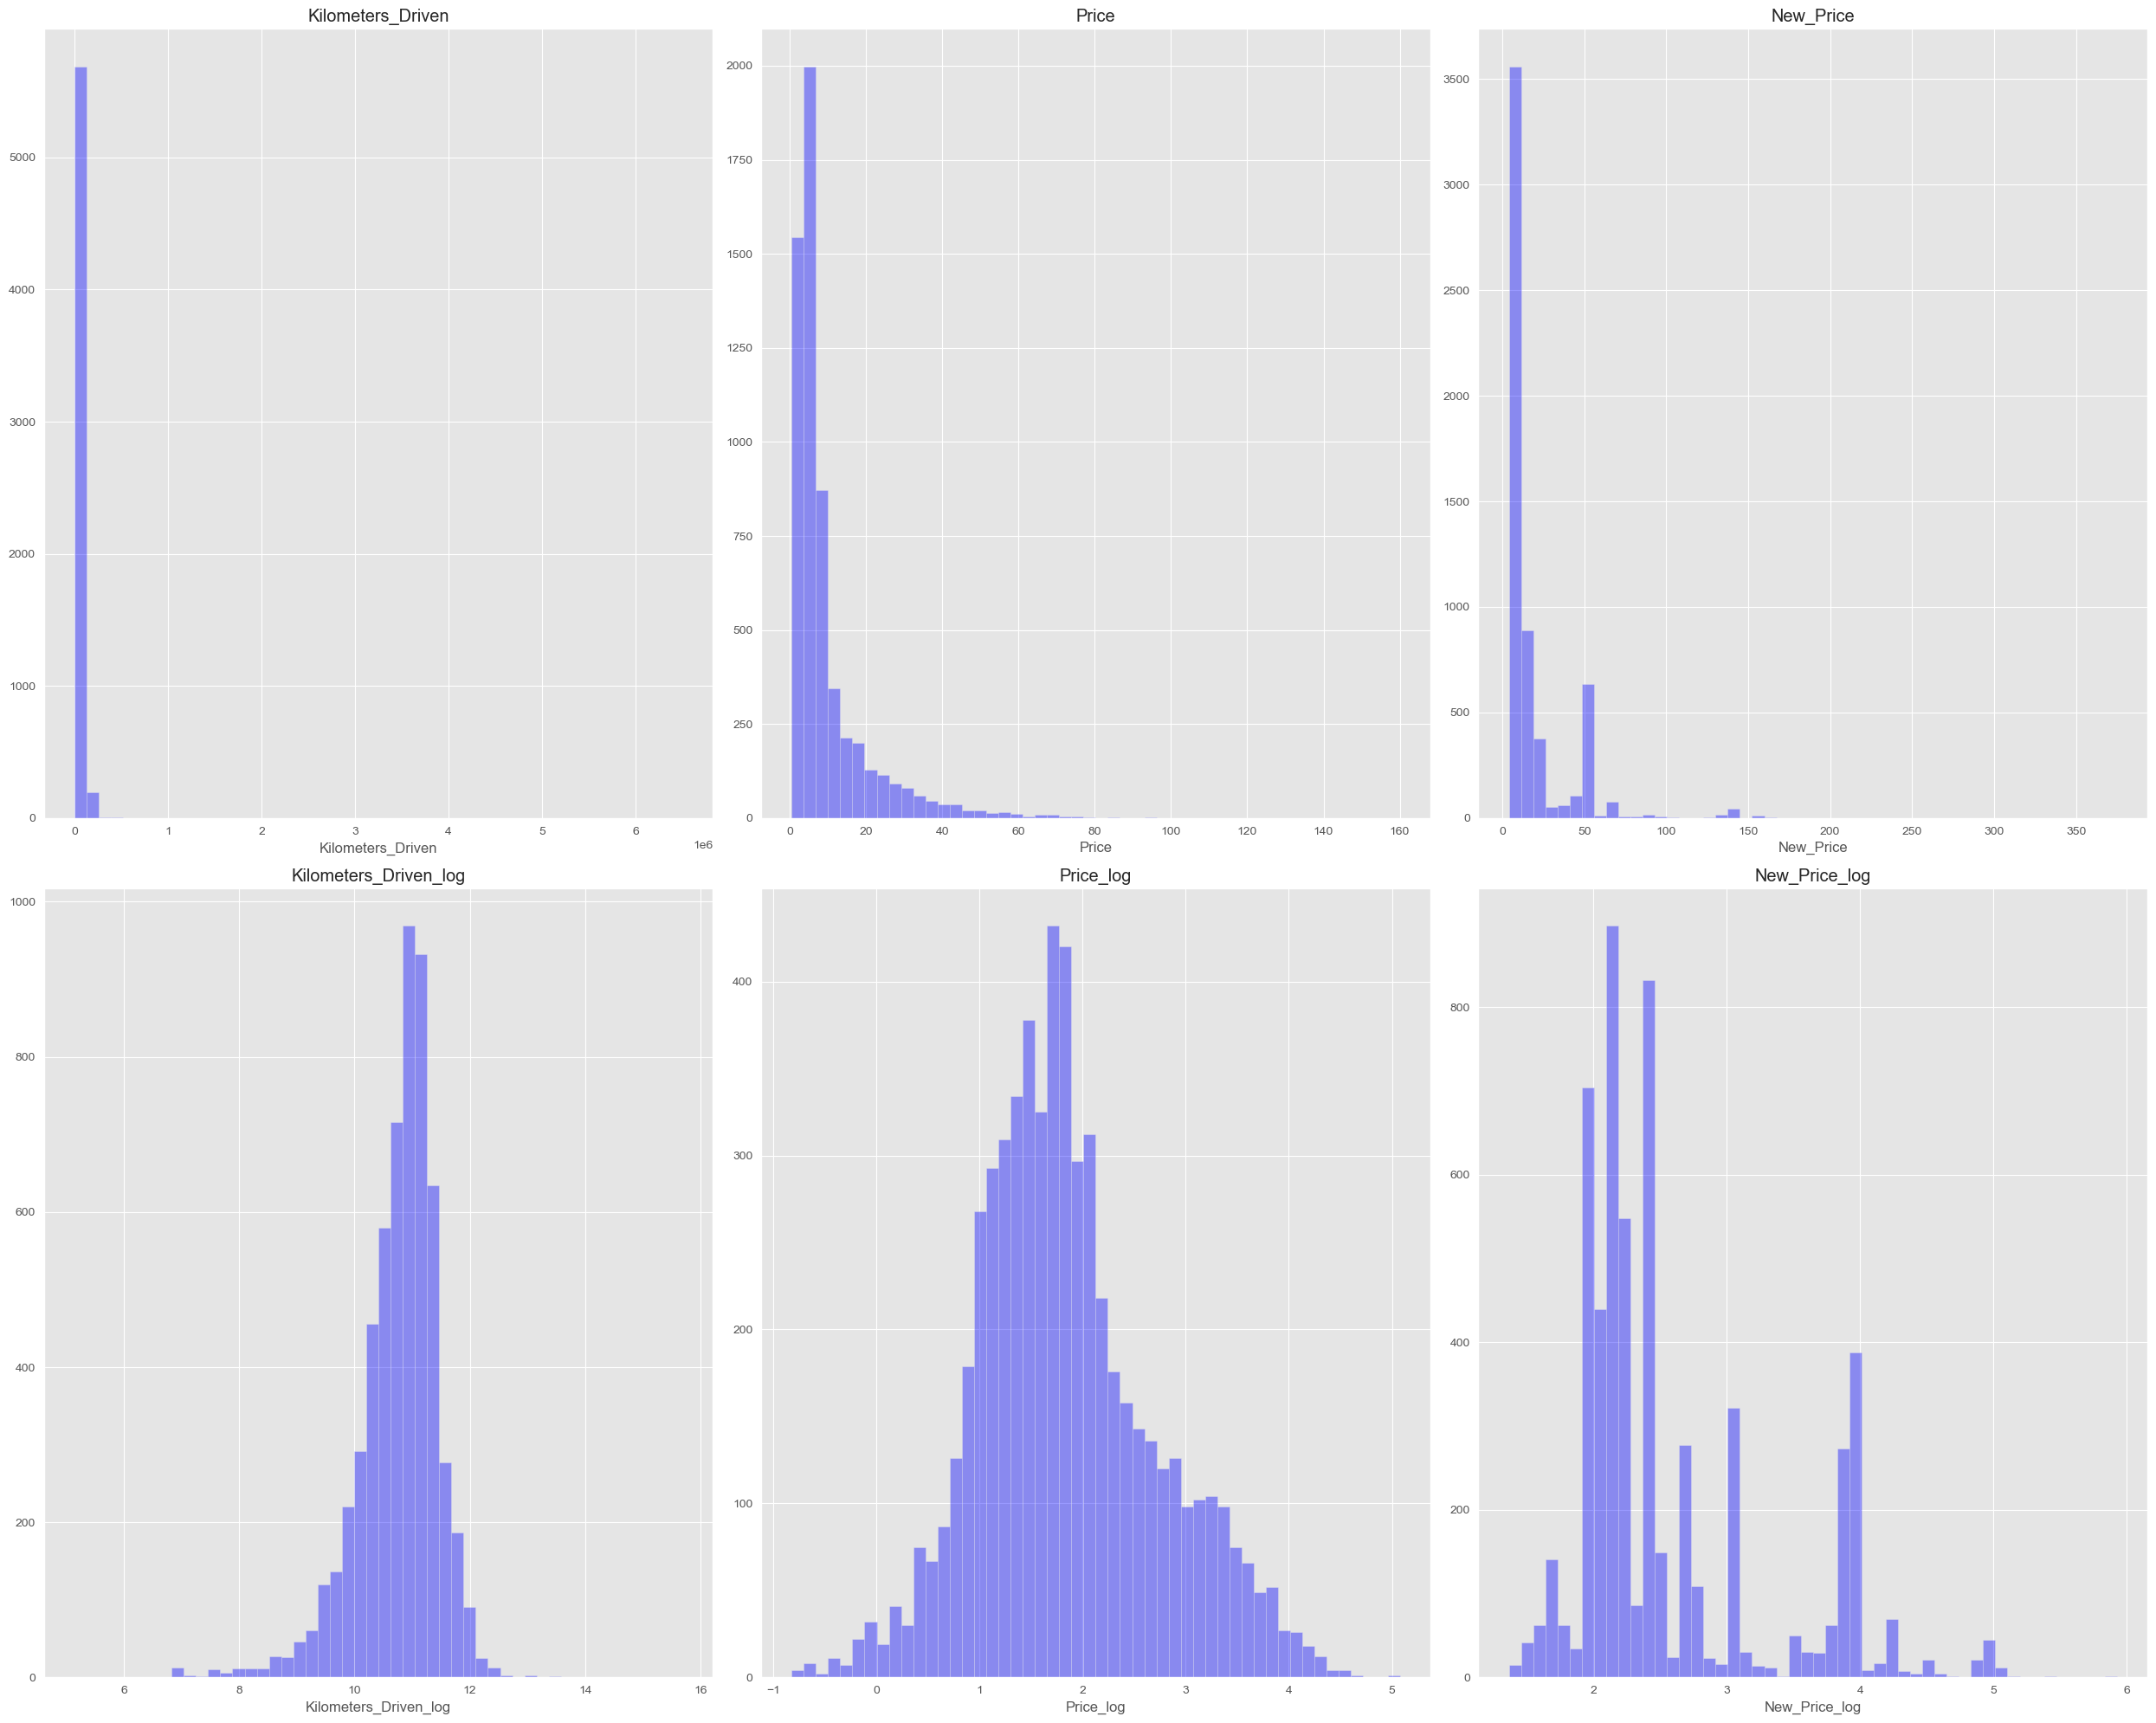

In [106]:
plt.style.use('ggplot')
cols = ['Kilometers_Driven','Price','New_Price','Kilometers_Driven_log','Price_log','New_Price_log']
plt.figure(figsize = (25,20))
for i, variable in enumerate(cols):
    plt.subplot(2,3,i+1)
    
    sns.distplot(car_df[variable], kde = False, color = 'blue')
    plt.tight_layout()
    plt.title(variable)

* New log transformed variable are less skewed.

In [107]:
car_df_model = car_df.drop(['Price','New_Price','Kilometers_Driven'], axis = 1)
car_df_model.drop('Year',axis = 1, inplace = True)
car_df_model

Location Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  \
0         Mumbai       CNG       Manual      First    26.60   998.0   58.16   
1           Pune    Diesel       Manual      First    19.67  1582.0  126.20   
2        Chennai    Petrol       Manual      First    18.20  1199.0   88.70   
3        Chennai    Diesel       Manual      First    20.77  1248.0   88.76   
4     Coimbatore    Diesel    Automatic     Second    15.20  1968.0  140.80   
...          ...       ...          ...        ...      ...     ...     ...   
6012  Coimbatore    Diesel       Manual      First    25.80  1498.0   98.60   
6013       Delhi    Diesel       Manual      First    28.40  1248.0   74.00   
6014      Jaipur    Diesel       Manual      First    24.40  1120.0   71.00   
6015      Jaipur    Diesel       Manual     Second    14.00  2498.0  112.00   
6016     Kolkata    Petrol       Manual      First    18.90   998.0   67.10   

      Seats     Brand      Model  Car_Age  Kilometers_Driven_log  Price_log  \
0       5.0    Maruti     WagonR       14              11.184421   0.559616   
1       5.0   Hyundai   Creta1.6        9              10.621327   2.525729   
2       5.0     Honda      JazzV       13              10.736397   1.504077   
3       7.0    Maruti  ErtigaVDI       12              11.373663   1.791759   
4       5.0      Audi      A4New       11              10.613246   2.875822   
...     ...       ...        ...      ...                    ...        ...   
6012    5.0     Honda    AmazeVX        9              11.164814   1.574846   
6013    5.0    Maruti   SwiftVDI       10              10.217020   1.558145   
6014    5.0   Hyundai   Xcent1.1        9              11.512925   1.386294   
6015    8.0  Mahindra     XyloD4       12              10.915088   1.064711   
6016    5.0    Maruti     WagonR       11              10.736397   0.974560   

      New_Price_log  
0          1.706565  
1          2.776332  
2          2.152924  
3          2.417252  
4          3.972930  
...             ...  
6012       2.268511  
6013       2.064328  
6014       2.107786  
6015       2.458734  
6016       1.706565  

[5892 rows x 14 columns]

In [108]:
car_df_model.columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Brand', 'Model', 'Car_Age',
       'Kilometers_Driven_log', 'Price_log', 'New_Price_log'],
      dtype='object')

In [135]:
# defining independent(x1)and dependent(y1) variables
x1 = car_df_model[['Location', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 
                   'Power', 'Seats', 'Brand', 'New_Price_log','Kilometers_Driven_log','Car_Age']]
y1 = car_df_model['Price_log'] 

In [136]:
## creating dummy varibale by on-hot encoding
x1 = pd.get_dummies(x1, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand'], drop_first = False).astype(int)

In [137]:
x1.head(10)

Mileage  Engine  Power  Seats  New_Price_log  Kilometers_Driven_log  \
0       26     998     58      5              1                     11   
1       19    1582    126      5              2                     10   
2       18    1199     88      5              2                     10   
3       20    1248     88      7              2                     11   
4       15    1968    140      5              3                     10   
5       21     814     55      5              2                     11   
6       23    1461     63      5              2                     11   
7       11    2755    171      8              3                     10   
8       20    1598    103      5              2                     11   
9       22    1248     74      5              2                     11   

   Car_Age  Location_Ahmedabad  Location_Bangalore  Location_Chennai  ...  \
0       14                   0                   0                 0  ...   
1        9                   0                   0                 0  ...   
2       13                   0                   0                 1  ...   
3       12                   0                   0                 1  ...   
4       11                   0                   0                 0  ...   
5       12                   0                   0                 0  ...   
6       11                   0                   0                 0  ...   
7        8                   0                   0                 0  ...   
8       11                   0                   0                 0  ...   
9       12                   0                   0                 1  ...   

   Brand_Nissan  Brand_OpelCorsa  Brand_Porsche  Brand_Renault  Brand_Skoda  \
0             0                0              0              0            0   
1             0                0              0              0            0   
2             0                0              0              0            0   
3             0                0              0              0            0   
4             0                0              0              0            0   
5             0                0              0              0            0   
6             1                0              0              0            0   
7             0                0              0              0            0   
8             0                0              0              0            0   
9             0                0              0              0            0   

   Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0            0           0             0                 0            0  
1            0           0             0                 0            0  
2            0           0             0                 0            0  
3            0           0             0                 0            0  
4            0           0             0                 0            0  
5            0           0             0                 0            0  
6            0           0             0                 0            0  
7            0           0             1                 0            0  
8            0           0             0                 1            0  
9            0           1             0                 0            0  

[10 rows x 61 columns]

#### Importing the liberaries for modeling

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats 
from sklearn.metrics import mean_squared_error


In [139]:
# add constant so that, regression line do not pass through origin points and have some intersect of dependent variable axis
x = sm.add_constant(x1)
y = y1

In [140]:
# splitting the data between train and test data in 70/30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 80)

In [141]:
# Model Building
reg_model = sm.OLS(y_train,x_train).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:23:12   Log-Likelihood:                 237.08
No. Observations:                4124   AIC:                            -374.2
Df Residuals:                    4074   BIC:                            -57.92
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###### R squared and adjusted R squared are very high for the model. This indicates that we have created a good model., which can explain variance in price of used cars for upto 93%.
###### F -Stattistics for the modle shows that over all model is significant and there is no over fitting and under fitting of the model.
###### However, our model indicate instance of mutlicollinearity among few feature variables. Let's perform varinace inflation factor (VIF) for each feature and we will drop the column with VIF > 5
###### Interpreting VIF Values: VIF = 1: No correlation between this predictor and the other predictors.1 < VIF < 5: Moderate correlation, generally VIF > 5: High correlation, indicates multicollinearity. Consider removing or combining predictors.VIF > 10: Very high correlation, multicollinearity is a serious concern.

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(train):
    vif_data = pd.DataFrame()
    vif_data["feature"] = train.columns
    vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif_data

In [117]:
calculate_vif(x_train)

feature        VIF
0                       const   0.000000
1                     Mileage   3.772722
2                      Engine  10.990583
3                       Power   9.994302
4                       Seats   2.598296
5               New_Price_log   6.984371
6       Kilometers_Driven_log   1.638223
7                     Car_Age   2.095288
8          Location_Bangalore   2.418094
9            Location_Chennai   2.900912
10        Location_Coimbatore   3.472898
11             Location_Delhi   3.061380
12         Location_Hyderabad   3.767538
13            Location_Jaipur   2.627828
14             Location_Kochi   3.510292
15           Location_Kolkata   3.037932
16            Location_Mumbai   3.893392
17              Location_Pune   3.338022
18           Fuel_Type_Diesel  33.183831
19         Fuel_Type_Electric   1.092607
20              Fuel_Type_LPG   1.269876
21           Fuel_Type_Petrol  34.530613
22        Transmission_Manual   2.252274
23  Owner_Type_Fourth & Above   1.013074
24          Owner_Type_Second   1.182736
25           Owner_Type_Third   1.128347
26                 Brand_Audi        inf
27                  Brand_BMW        inf
28              Brand_Bentley        inf
29            Brand_Chevrolet        NaN
30               Brand_Datsun        inf
31                 Brand_Fiat        inf
32                Brand_Force        NaN
33                 Brand_Ford        inf
34            Brand_Hindustan        NaN
35                Brand_Honda        inf
36              Brand_Hyundai        inf
37                Brand_Isuzu        inf
38               Brand_Jaguar        inf
39                 Brand_Jeep        inf
40          Brand_Lamborghini        NaN
41           Brand_Land Rover        inf
42             Brand_Mahindra        inf
43               Brand_Maruti        inf
44        Brand_Mercedes-Benz        inf
45          Brand_Mini Cooper        inf
46           Brand_Mitsubishi        inf
47               Brand_Nissan        inf
48            Brand_OpelCorsa        NaN
49              Brand_Porsche        inf
50              Brand_Renault        inf
51                Brand_Skoda        inf
52                Brand_Smart        NaN
53                 Brand_Tata        inf
54               Brand_Toyota        inf
55           Brand_Volkswagen        inf
56                Brand_Volvo        inf

#### Engine, Power, New_Price_log and Fuel_Type have high VIF>5. Fule_Type is considered to be an important preference making factor in car purcahse decision making. Therefore, we can not remove Fuel_Type column.
#### Let's drop one column at a time and check VIF subsequently.

In [143]:
x_train.drop('Engine', axis =1,inplace =True)

In [144]:
calculate_vif(x_train)

feature       VIF
0              const  0.000000
1            Mileage  3.368948
2              Power  4.115990
3              Seats  2.472132
4      New_Price_log  6.984230
..               ...       ...
56       Brand_Smart       NaN
57        Brand_Tata       inf
58      Brand_Toyota       inf
59  Brand_Volkswagen       inf
60       Brand_Volvo       inf

[61 rows x 2 columns]

### It turns out that, removal of one column can reduce the VIF  and hence mutlicollinearity factor among columns. VIF for Power has come down below 5. (In practical sense, volumn of engine is strongly positively correlated to the power it can deliver).New_Price_log still have VIF >5, Thus we will remove it

In [120]:
x_train.drop('New_Price_log', axis =1,inplace =True)

### For all desired predictors, VIF is below 5, therefore we need to again build regression model based on new training dataset

In [145]:
calculate_vif(x_train)

feature       VIF
0              const  0.000000
1            Mileage  3.368948
2              Power  4.115990
3              Seats  2.472132
4      New_Price_log  6.984230
..               ...       ...
56       Brand_Smart       NaN
57        Brand_Tata       inf
58      Brand_Toyota       inf
59  Brand_Volkswagen       inf
60       Brand_Volvo       inf

[61 rows x 2 columns]

In [146]:
reg_model = sm.OLS(y_train,x_train).fit()

In [147]:
## dropping Engine and New_Price_log column from x_test dataset
x_test.drop(['Engine','New_Price_log'],axis = 1, inplace = True)

In [148]:
residuals = reg_model.resid

### Test Assumptions¶
###### Checking the Linear Regression Assumptions
   * Mean of residuals should be 0
   * Linearity of variables
   * Normality of error terms

In [149]:
## mean of residuals
residuals.mean()

-1.6705464471600296e-14

* Mean of residuals is very close to zero. Hnece 1st assumption is true

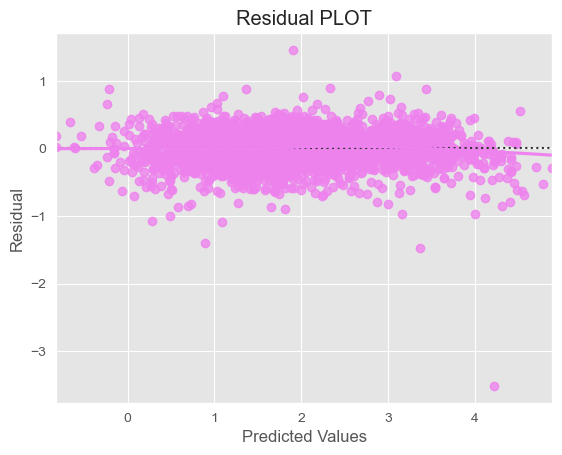

In [150]:
### Linearity of variables
y_predict = reg_model.predict(x_train)
sns.residplot(x = y_predict, y = residuals, color = 'violet',lowess = True)
plt.xlabel("Predicted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

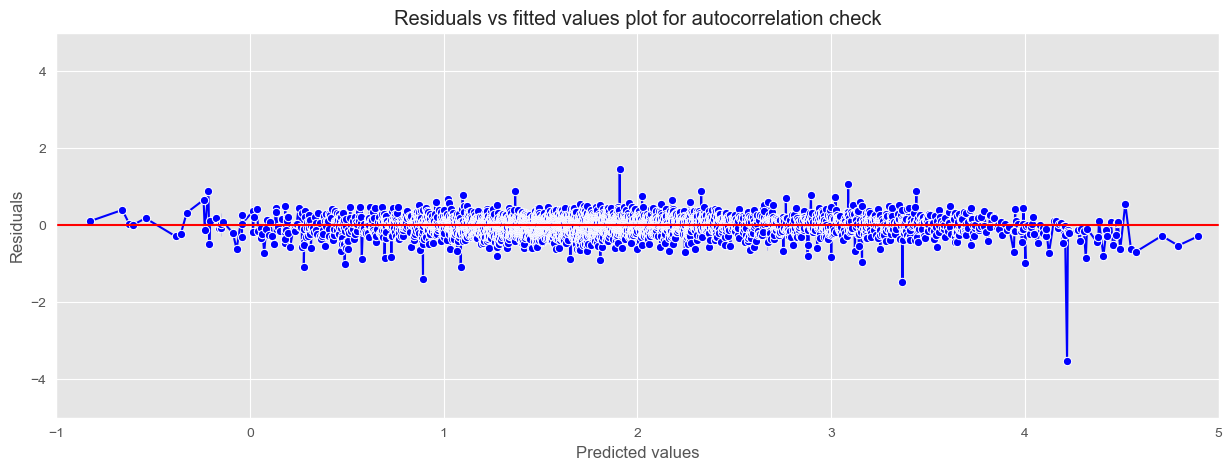

In [151]:
plt.figure(figsize=(15,5))
p = sns.lineplot(x = y_predict,y = residuals,marker='o',color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,5)
plt.xlim(-1,5)
p = sns.lineplot(x = [-1,5],y = [0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

* Assumptions 2 is satisfied, there is no pattern in the residual vs predicted values plot.



<Axes: ylabel='Density'>

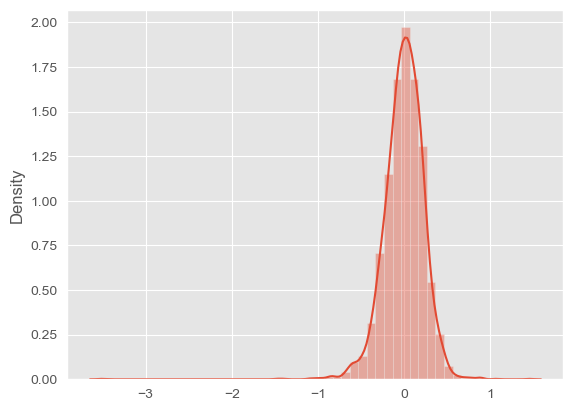

In [152]:
# Normality of error terms
sns.distplot(residuals)

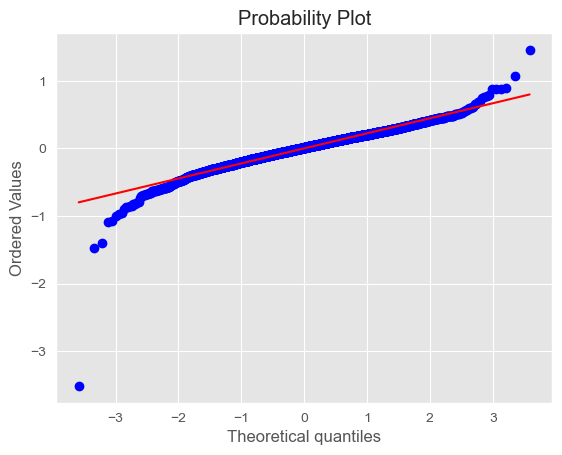

In [153]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

* The residuals are close to normal distribution. Thus 3rd assumption is satisfied.

In [160]:
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1138.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:25:45   Log-Likelihood:                 227.16
No. Observations:                4124   AIC:                            -356.3
Df Residuals:                    4075   BIC:                            -46.41
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [162]:
y_predict_test = reg_model.predict(x_test)

In [156]:
print('MSE for train data set',mean_squared_error(y_train, y_predict))
print('MSE for test data set',mean_squared_error(y_test, y_predict_test))

MSE for train data set 0.05244233087785979
MSE for test data set 0.05913168408742401


* Mean Squared Error for train and test datset is almot same and close to zero. This indicates that we did not overfit the train data.

In [157]:
from sklearn.metrics import mean_absolute_error

# Sample data: actual values and predicted values
actual = y_train
predicted = y_predict
# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error (MAE): {mae}")
# Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (MSE): {mse}")
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - predicted) /y_train[y_train!=0] )) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.17044271510882436
Mean Squared Error (MSE): 0.05244233087785979
Root Mean Squared Error (RMSE): 0.2290029058284191
Mean Absolute Percentage Error (MAPE): 16.57%


# Observation from the Model

### It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.
#### 1. With our linear regression model we have been able to capture ~93 variation in depedndent variable using our data
#### 2. The model indicates that the most significant predictors of price of used cars are -
   * Mileage
   * Seats
   * Age of car
   * Kilometers Driven
   * Transmission Type : Automatic/Manual
   * Brand of cars
   * Location 
   * Fuel_Type
   * owner_Type
#### 3. Newer cars sell for higher prices. 1 unit increase in age of the car leads to [ exp(0.1208) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.
#### 4. Choosing a car that is automatic insted to manual transmission type leads[ exp(0.1057) = 1.11 Lakh ] increase in price of the vehicle, when everything esle is constant.
#### 5. Other Insights
   * Mileage is inversely propotional to price. Higher Mileage cars are low budget cars.
   * Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price

# Recommendations

* Chennai, Coimbatore, Hyderabad, Bangalore tending to have higher used car prices. We can focus more on these cities to grow the business more.

* Jaipur, Mumbai, Delhi, Pune, Kochi cities have relatively riskier markets. It'd be beneficial to do market research to strategize growth in these cities.

* Kolkata appears to be a very risky market for used cars. Careful investment is advised here.

* With increasing Petrol price, Diesel cars are gaining popularity. Also, Electric cars are, although new, have a very good scope in the market. We should focus on acquiring more Diesel and Electric cars.

* Number of owners depreciates the used car prices. Thus, we should not acquire cars that have traversed through too many owners. Best is to get cars from the first owner.
* Auto transmission cars are sold for more price; we should concentrate on acquiring more auto-transmission cars.

* Dealers can fill up their inventory with Maruti, Honda , Toyota and Hyundai brands
* Considering the traffic in India these days, automatic cars may be best fit for many individuals. Dealers can acquire more automatic cars and market it accordingly to increase the sales 